In [3]:
#Importing necessary libraries
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from sklearn.model_selection import train_test_split
from scipy.interpolate import interp1d
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib


In [4]:
#Importing & loading dataset
df = pd.read_csv('IndianEcorates.csv')
#Convert Year to a datetime column
df['Year'] = pd.to_datetime(df['Year'])
# Make Year the index
df.set_index('Year', inplace=True)
df.head()

C:\Users\priya\AppData\Local\Temp\ipykernel_2220\2283586288.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Year'] = pd.to_datetime(df['Year'])


,GDP (current US$),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
Year,,,,,,,,
1960-12-31,3.702988e+10,6.83,4.46,674536630.9,1.78,445954579,2.31,41.13
1961-12-31,3.923244e+10,5.96,4.30,666357094.9,1.70,456351876,2.33,41.74
1962-12-31,4.216148e+10,6.03,4.17,512791844.0,3.63,467024193,2.34,42.34
1963-12-31,4.842192e+10,5.91,4.28,607862500.4,2.95,477933619,2.34,42.94
1964-12-31,5.648029e+10,5.69,3.73,499145125.8,13.36,489059309,2.33,43.57


In [148]:
df.tail()

,GDP (current US$),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
Year,,,,,,,,
2016-12-31,2.290000e+12,20.92,19.16,3.620000e+11,4.95,1338636340,1.19,68.67
2017-12-31,2.650000e+12,21.95,18.79,4.130000e+11,3.33,1354195680,1.16,68.97
2018-12-31,2.700000e+12,23.69,19.93,3.990000e+11,3.94,1369003306,1.09,69.27
2019-12-31,2.830000e+12,21.27,18.69,4.630000e+11,3.73,1383112050,1.03,69.50
2020-12-31,2.670000e+12,19.10,18.71,5.900000e+11,6.62,1396387127,0.96,69.73


In [149]:
#Checking for any duplicated rows
dup_rows = df[df.duplicated()]
print("Number of Duplicates:", df.duplicated().sum())

Number of Duplicates: 0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 1960-12-31 to 2020-12-31
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   GDP (current US$)                              61 non-null     float64
 1   Imports of goods and services (% of GDP)       61 non-null     float64
 2   Exports of goods and services (% of GDP)       61 non-null     float64
 3    Total reserves (includes gold, current US$)   61 non-null     float64
 4   Inflation, consumer prices (annual %)          61 non-null     float64
 5   Population, total                              61 non-null     int64  
 6   Population growth (annual %)                   61 non-null     float64
 7   Life expectancy at birth, total (years)        61 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 4.3 KB


In [151]:
df.columns

Index(['GDP (current US$) ', 'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       ' Total reserves (includes gold, current US$) ',
       'Inflation, consumer prices (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Life expectancy at birth, total (years)'],
      dtype='object')

In [152]:
#checking for unique values in columns
df.nunique()

GDP (current US$)                                60
Imports of goods and services (% of GDP)         61
Exports of goods and services (% of GDP)         60
 Total reserves (includes gold, current US$)     60
Inflation, consumer prices (annual %)            61
Population, total                                61
Population growth (annual %)                     45
Life expectancy at birth, total (years)          61
dtype: int64

Overall summary of our dataset
Dataset contains 61 rows & 8 columns.
Also for each of the columns, some of the non-null count are less than 61 which implies that some columns contain null/missing values.
Columns contains continuous data with Nill categorical values

In [153]:
#Getting overall statistics of the dataset
df.describe()


,GDP (current US$),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
count,6.100000e+01,61.000000,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,61.000000
mean,6.583962e+11,12.746393,10.885574,9.801839e+10,7.413279,8.913946e+08,1.927705,57.146230
std,8.127562e+11,8.155110,7.060458,1.496772e+11,4.940153,2.974496e+08,0.419024,8.459559
min,3.702988e+10,3.710000,3.310000,4.991451e+08,-7.630000,4.459546e+08,0.960000,41.130000
25%,9.952590e+10,6.590000,5.200000,2.324650e+09,4.010000,6.235242e+08,1.620000,50.630000
50%,2.880000e+11,8.570000,7.050000,1.151174e+10,6.670000,8.704522e+08,2.150000,57.660000
75%,8.200000e+11,19.640000,18.690000,1.380000e+11,10.020000,1.154639e+09,2.260000,64.310000
max,2.830000e+12,31.260000,25.430000,5.900000e+11,28.600000,1.396387e+09,2.340000,69.730000


From above output we can see the columns are not scaled. The mean, minimum and maximum values, and even the standard deviation values for all columns are very different.

# Standard Scaling

In [154]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [155]:
scaled_df = pd.DataFrame(scaled_data, columns = df.columns)
scaled_df.head()

,GDP (current US$),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
0,-0.770862,-0.731504,-0.917632,-0.655756,-1.149768,-1.509959,0.919917,-1.908982
1,-0.768130,-0.839071,-0.940481,-0.655811,-1.166096,-1.474714,0.968043,-1.836276
2,-0.764496,-0.830416,-0.959046,-0.656845,-0.772178,-1.438536,0.992107,-1.764762
3,-0.756729,-0.845253,-0.943337,-0.656205,-0.910968,-1.401556,0.992107,-1.693247
4,-0.746732,-0.872453,-1.021882,-0.656937,1.213742,-1.363842,0.968043,-1.618157


In [156]:
round((scaled_df.describe()),3)

,GDP (current US$),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
count,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000
mean,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000
std,1.008,1.008,1.008,1.008,1.008,1.008,1.008,1.008
min,-0.771,-1.117,-1.082,-0.657,-3.070,-1.510,-2.329,-1.909
25%,-0.693,-0.761,-0.812,-0.645,-0.695,-0.908,-0.740,-0.777
50%,-0.460,-0.516,-0.548,-0.583,-0.152,-0.071,0.535,0.061
75%,0.200,0.852,1.115,0.269,0.532,0.892,0.800,0.854
max,2.694,2.289,2.077,3.314,4.324,1.712,0.992,1.500


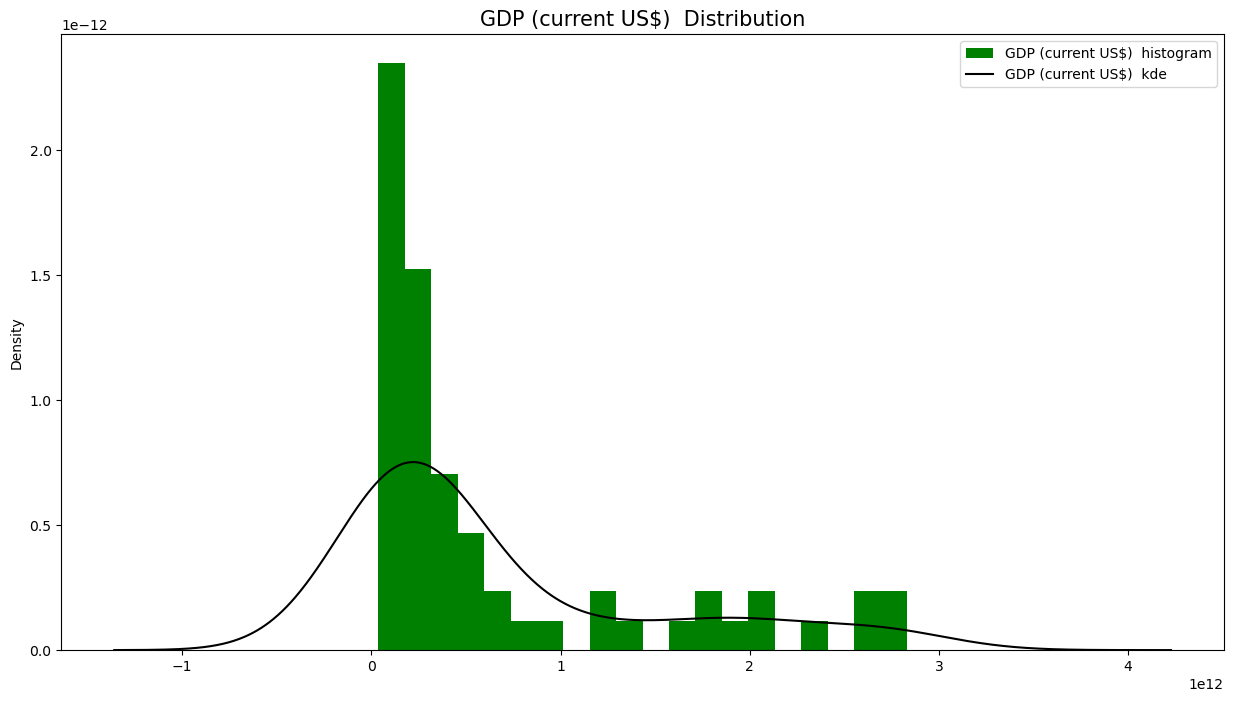

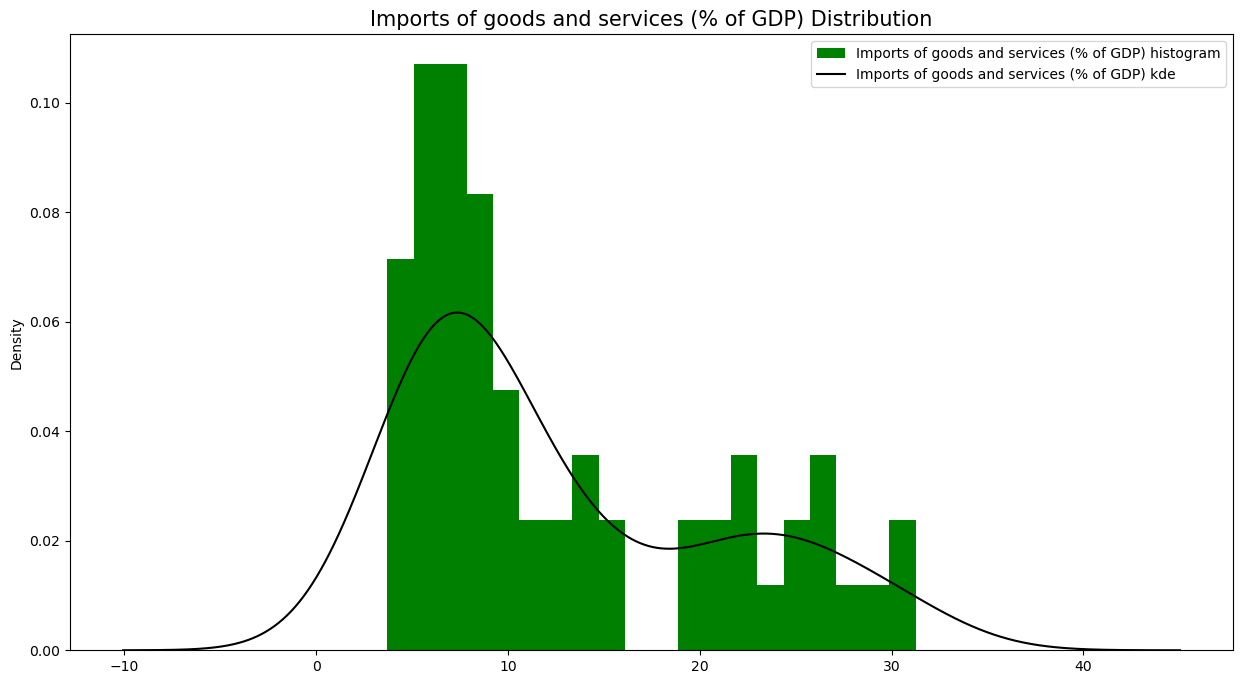

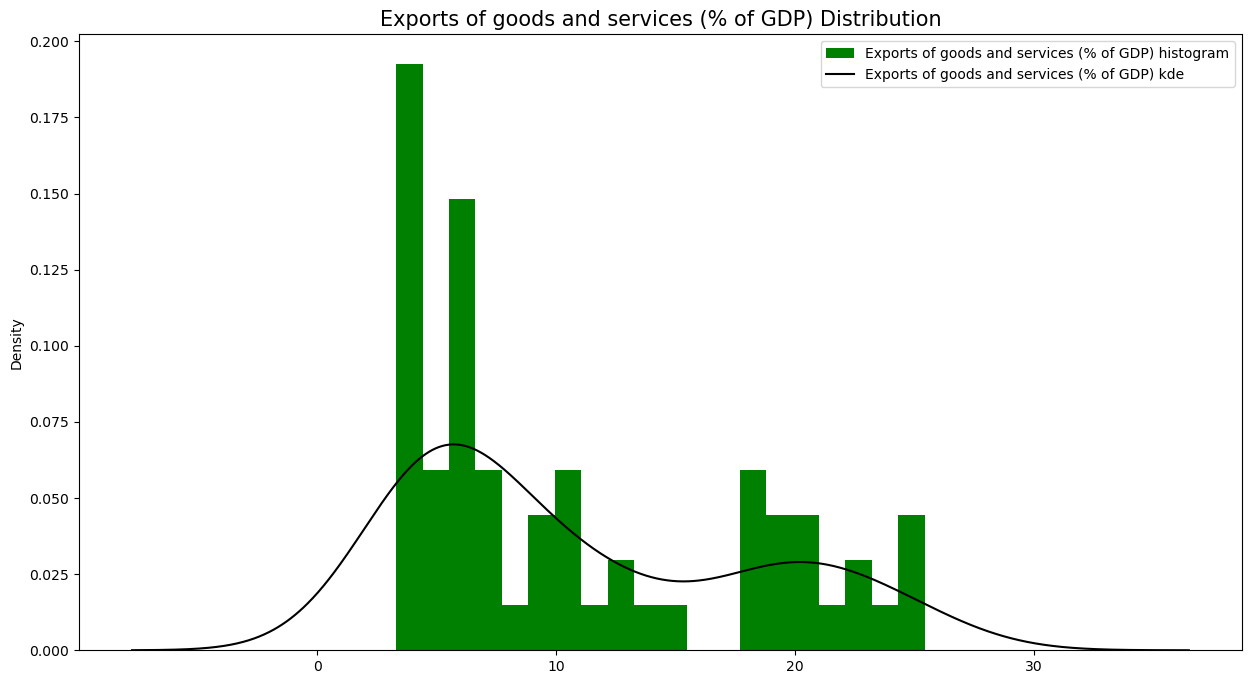

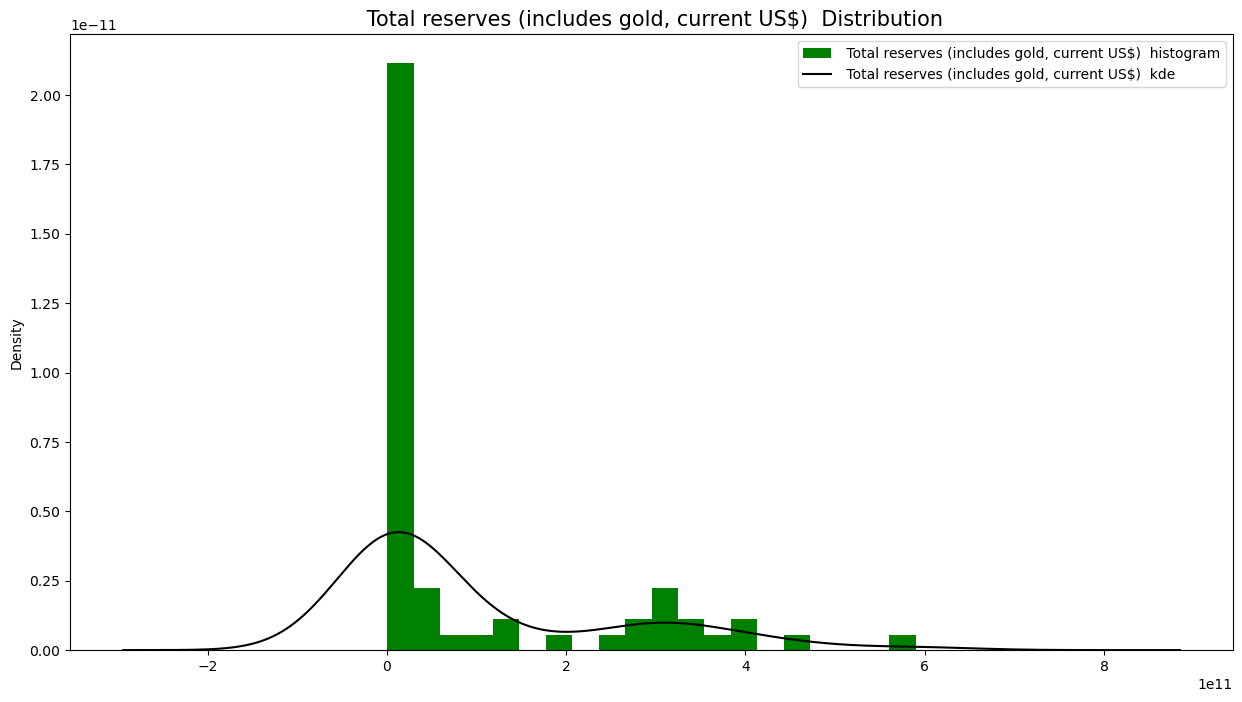

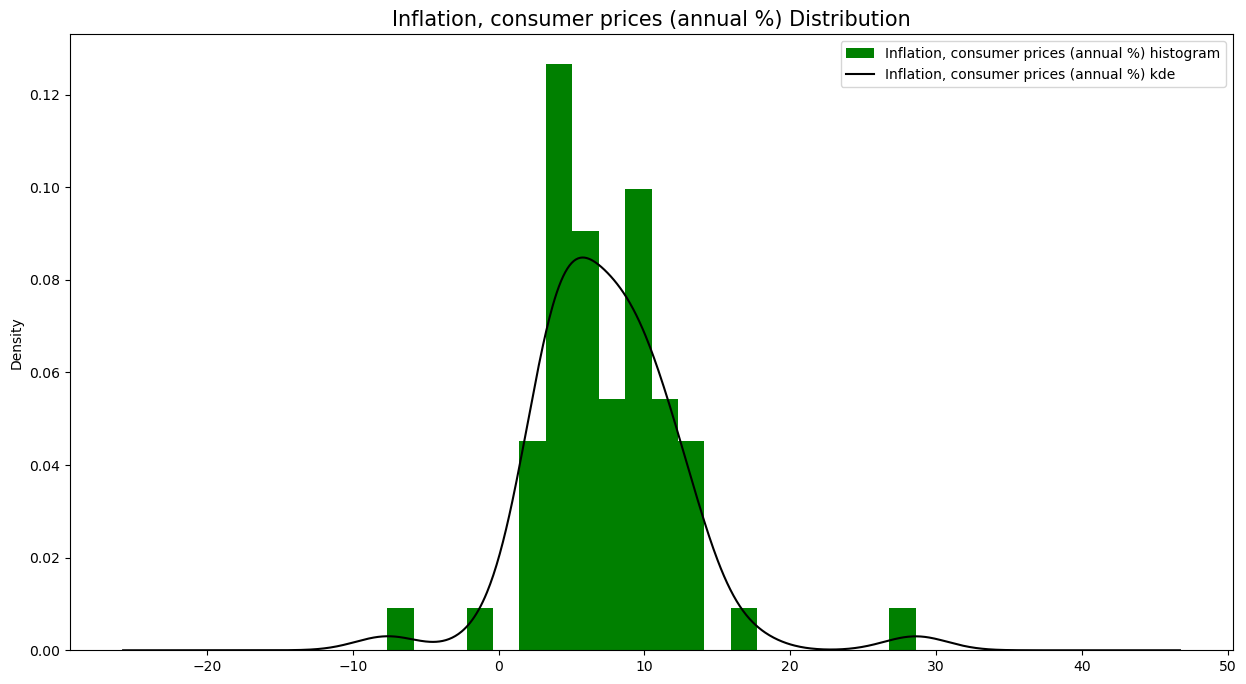

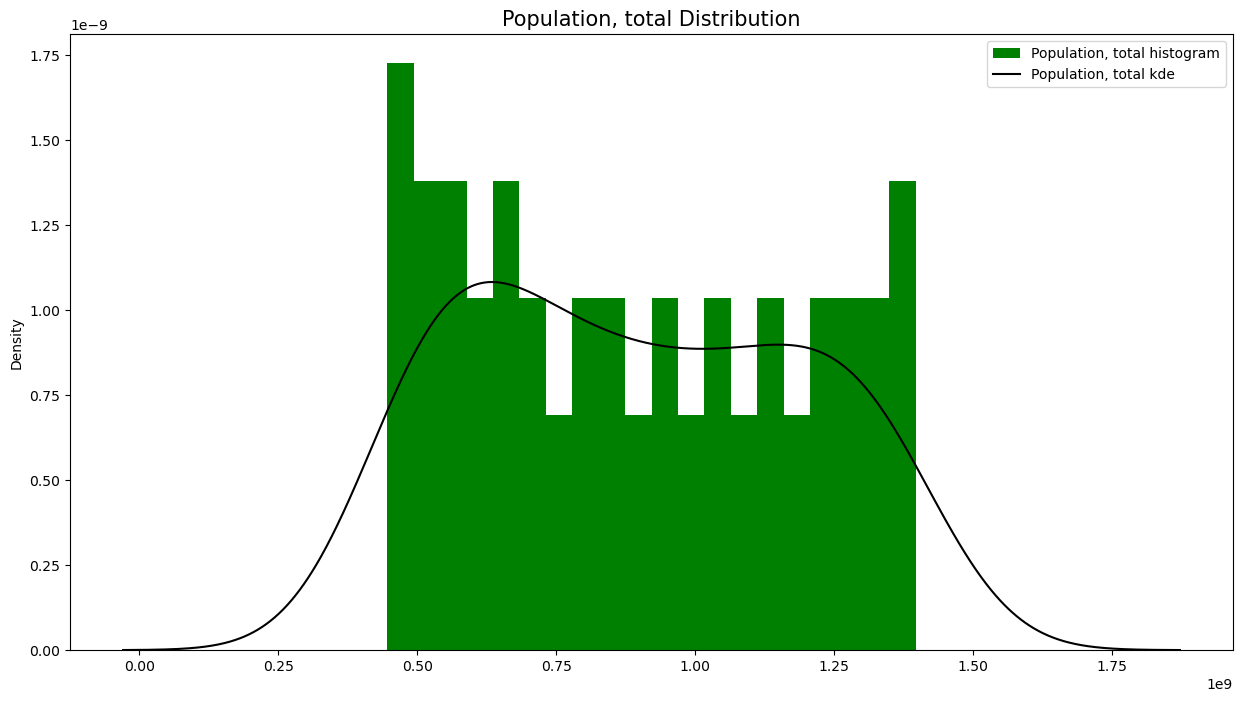

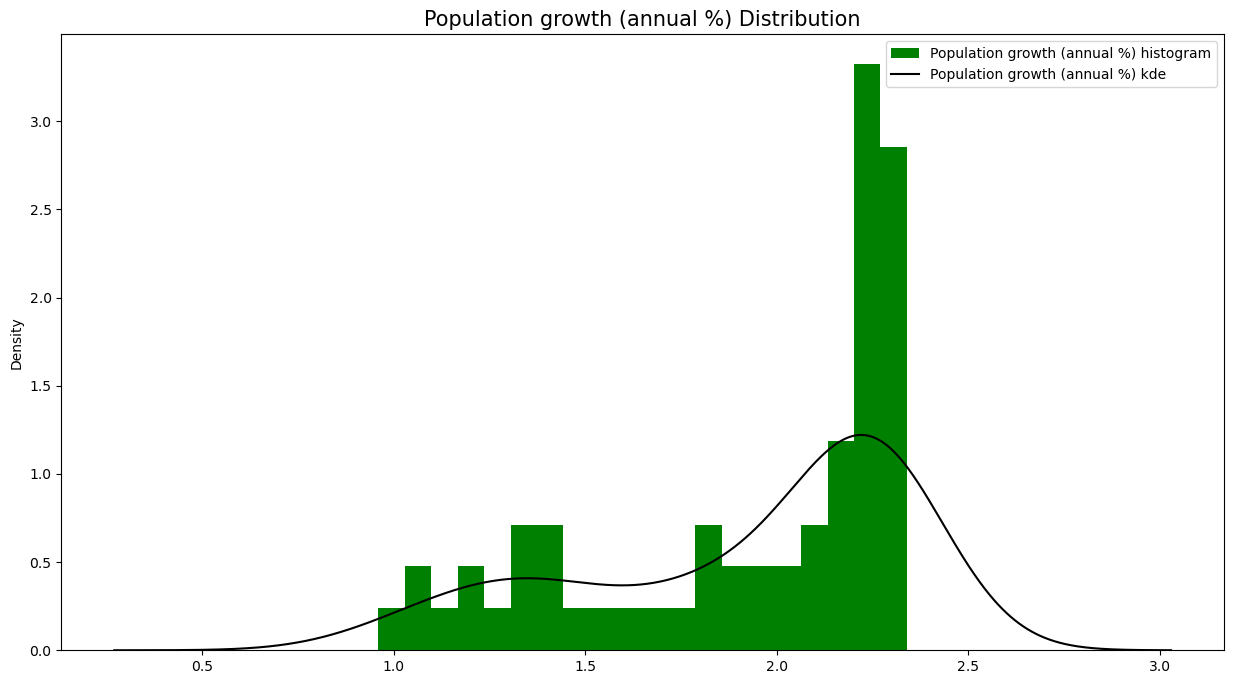

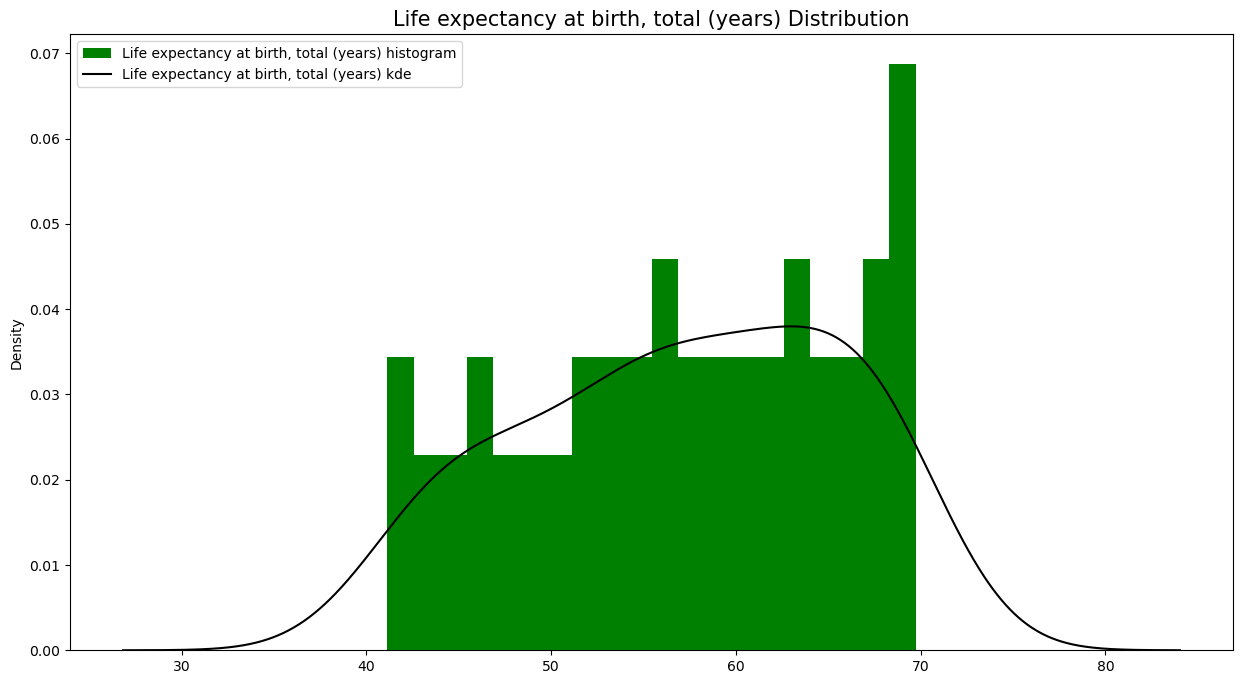

In [157]:
# For all the variables, check distribution by creating a histogram with kde
for column in df:
    df[column].plot.hist(density=True, bins=20, label = column+' histogram',color='green')
    df[column].plot.kde(label =column+' kde',color='black')
    plt.title(column+ ' Distribution', fontsize = 15)
    plt.legend()
    plt.show()

In the plot above, the dark green squares correspond to highly correlated features (>0.75). Darker brown segments corresponds to negatively correlated features (<-0.75).
The diagonal represents the correlation of a feature with itself, therefore the value is 1.
We can also see that there are a few features that are highly correlated.

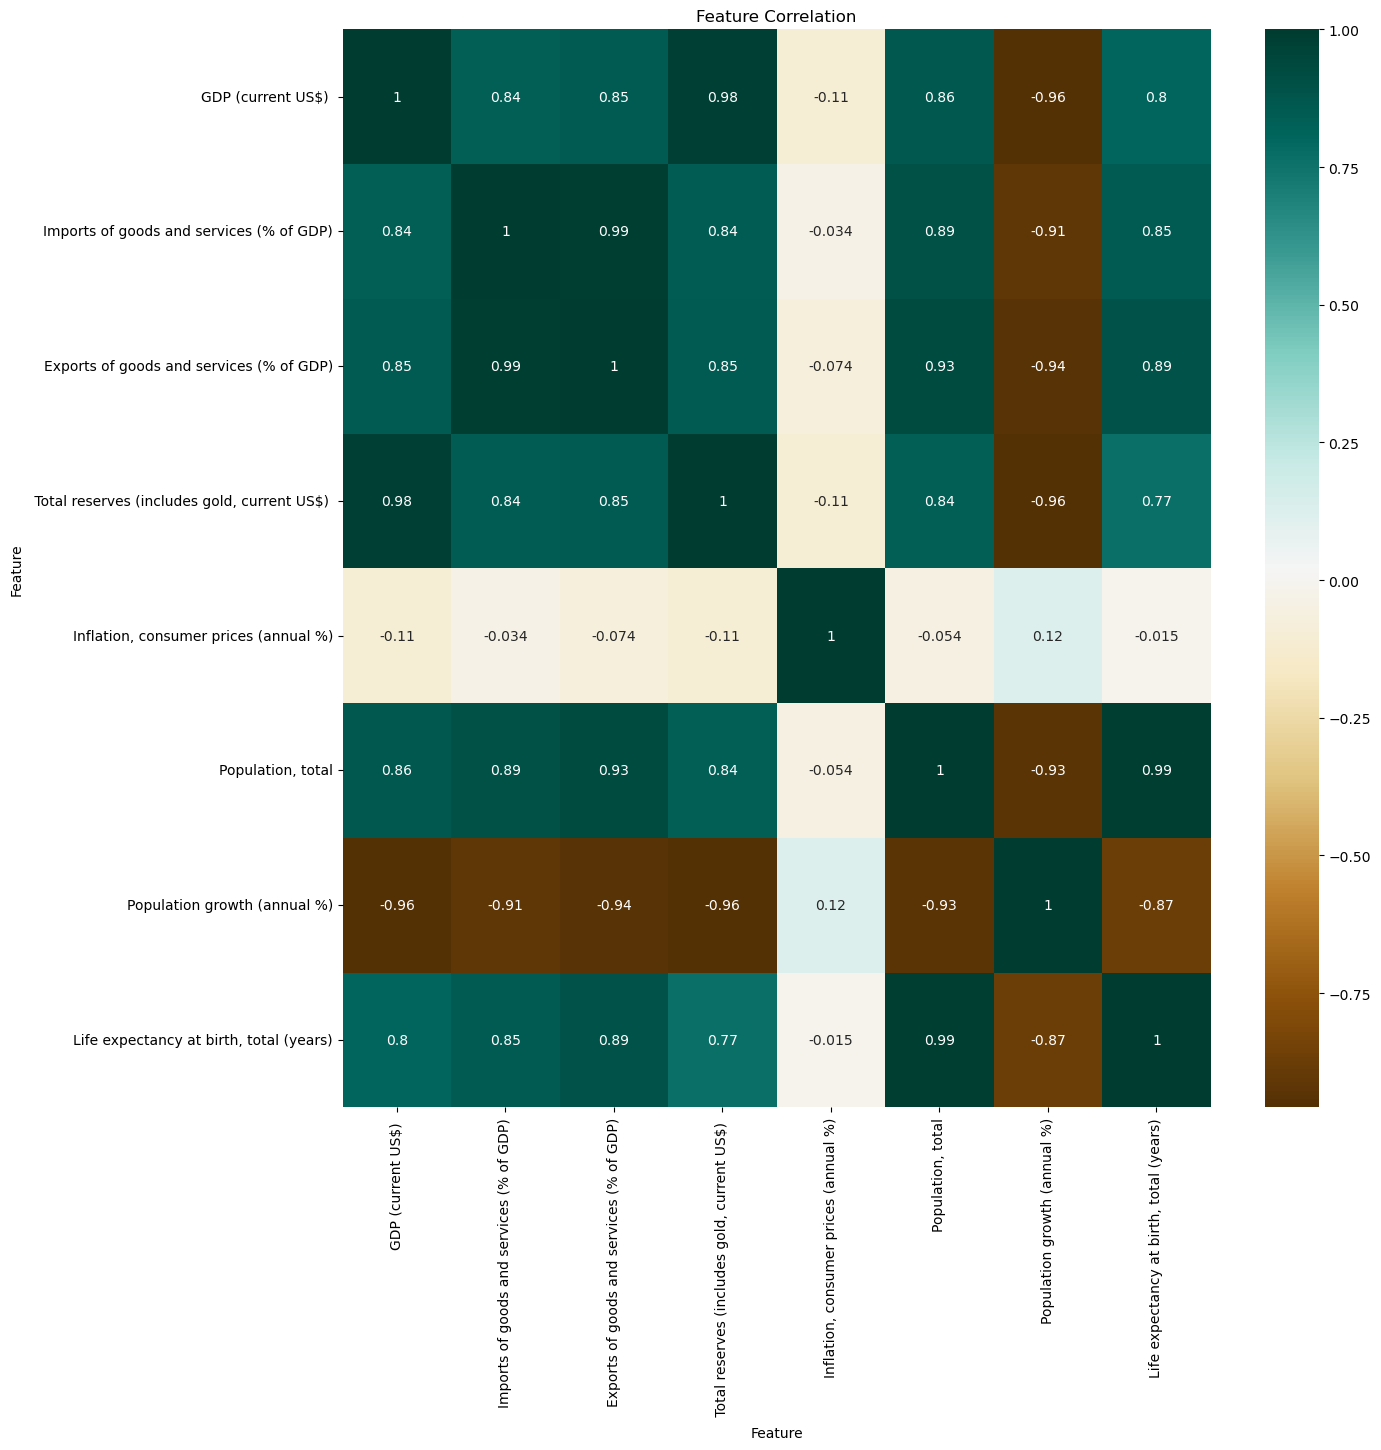

In [158]:
#Correlation heatmap
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(scaled_df.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Feature', ylabel = 'Feature')
plt.show()


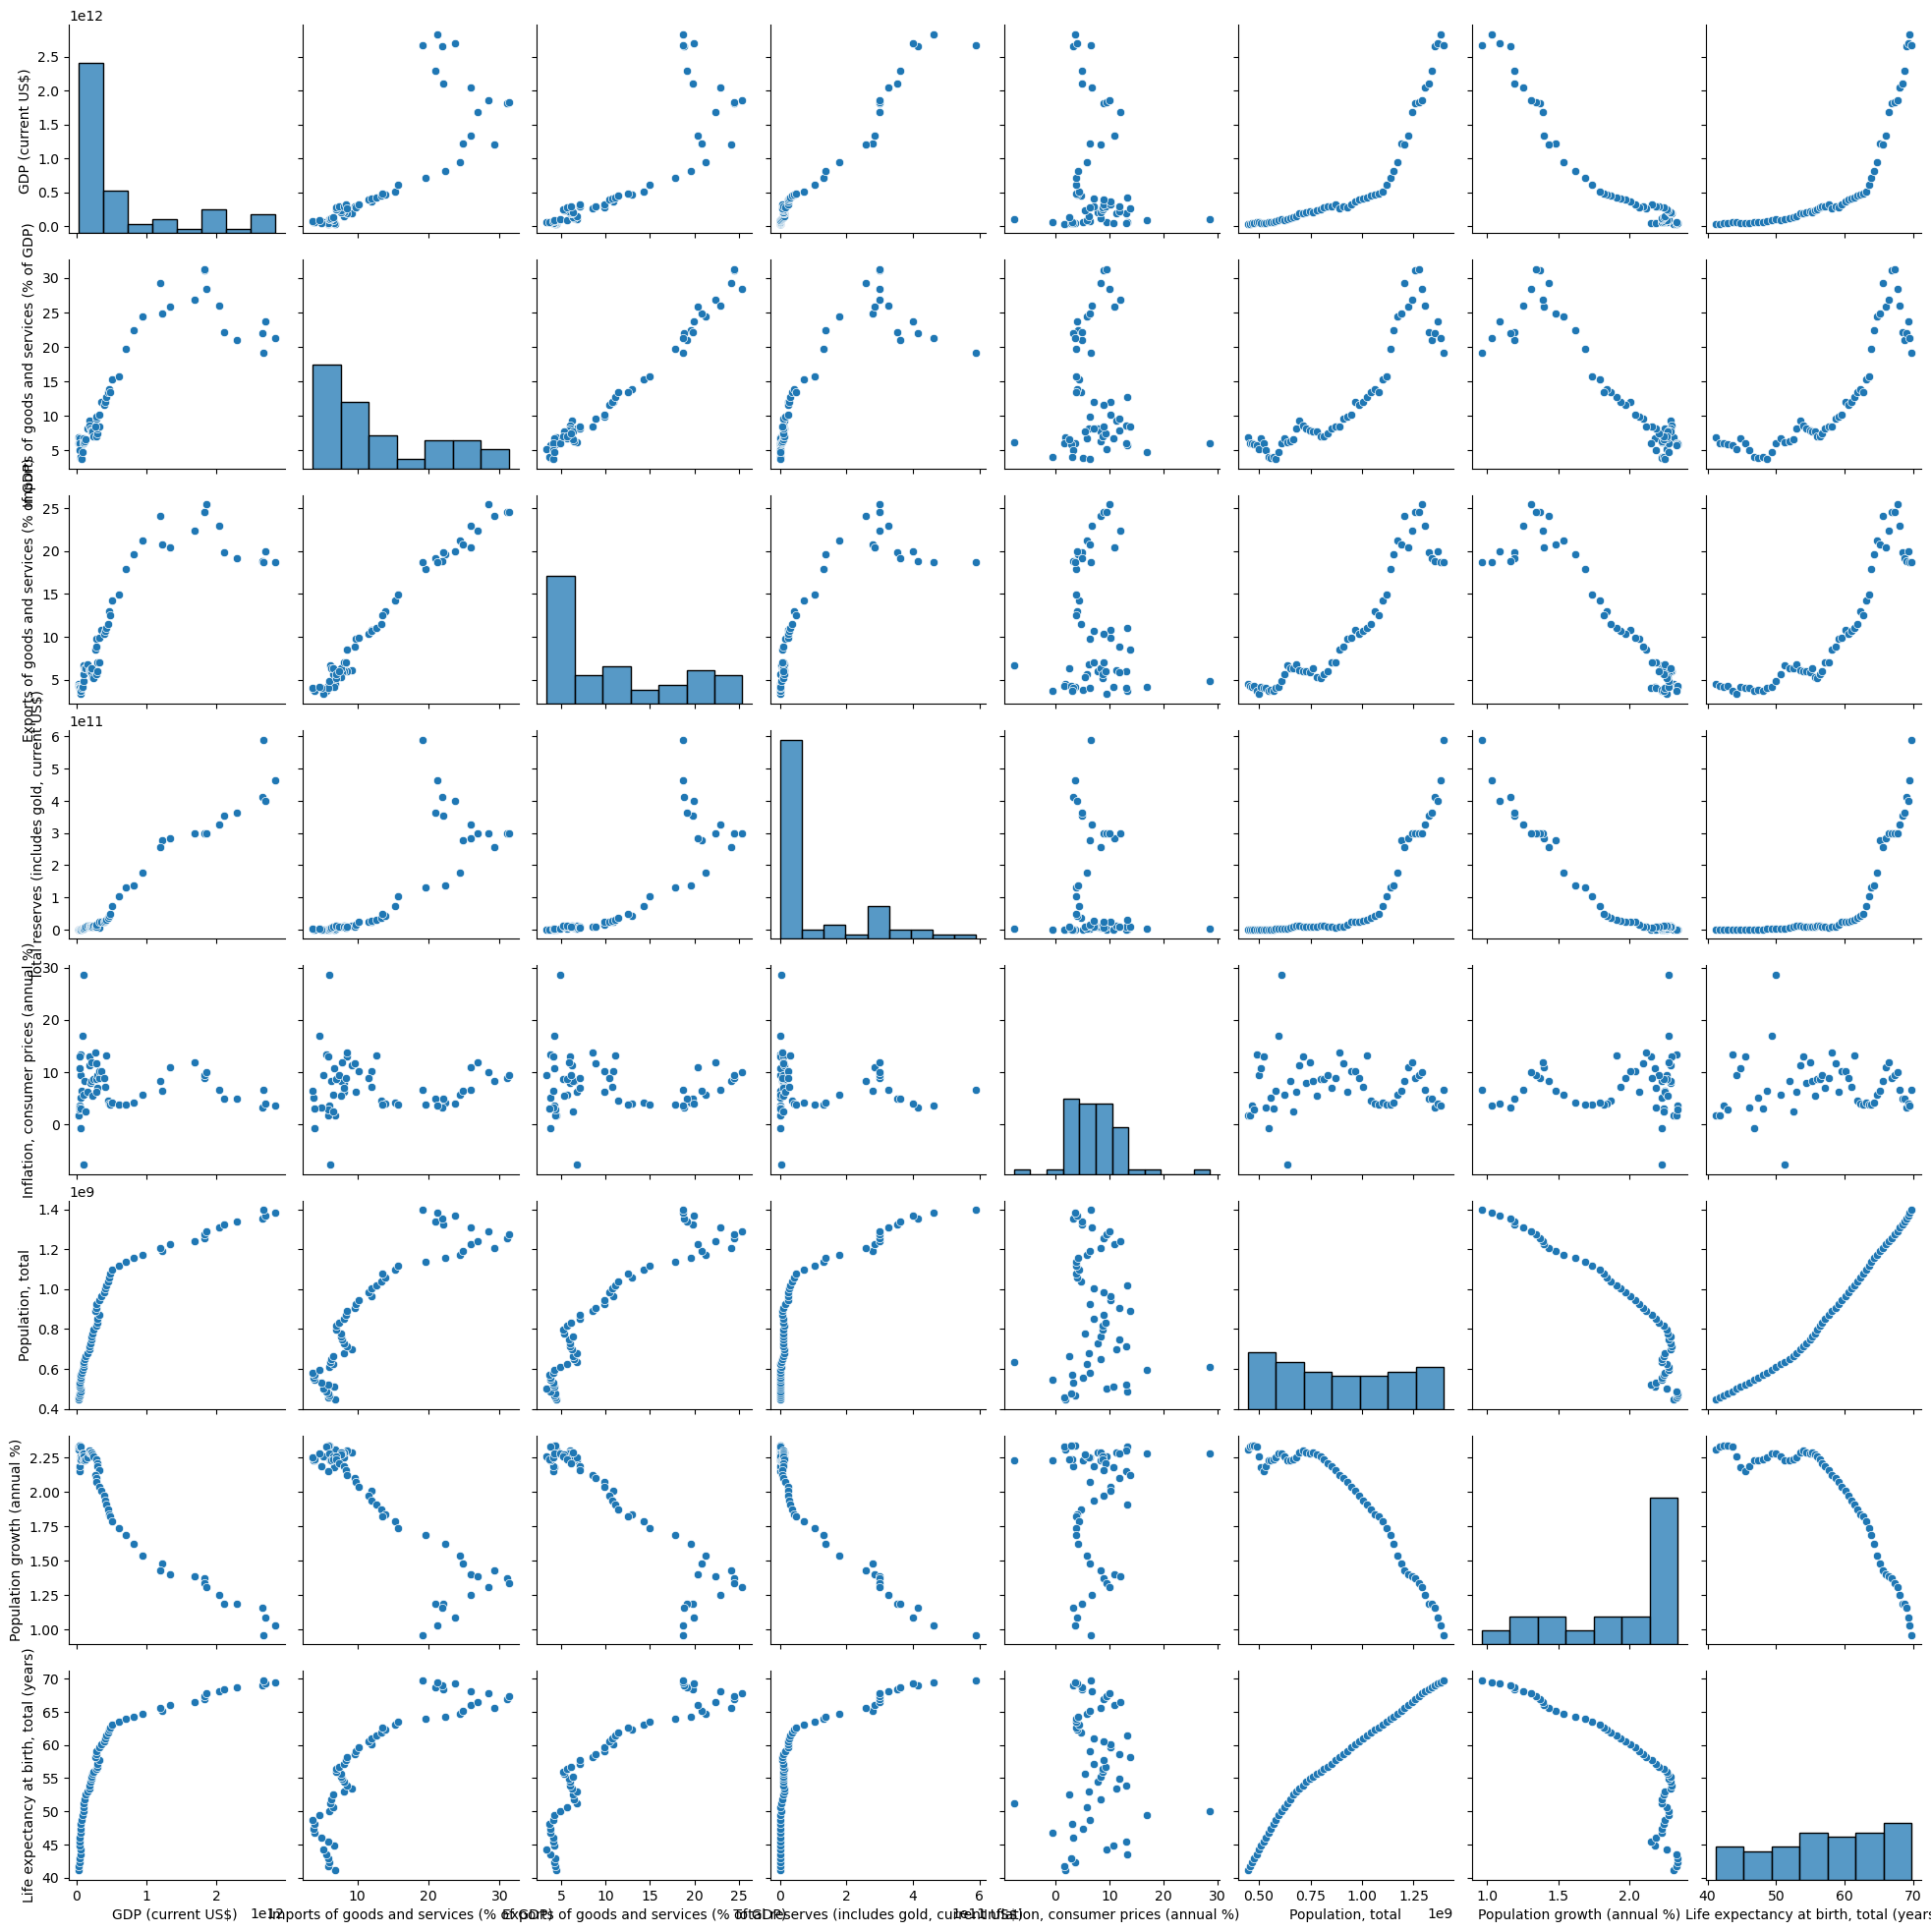

In [159]:
 sns.pairplot(df)

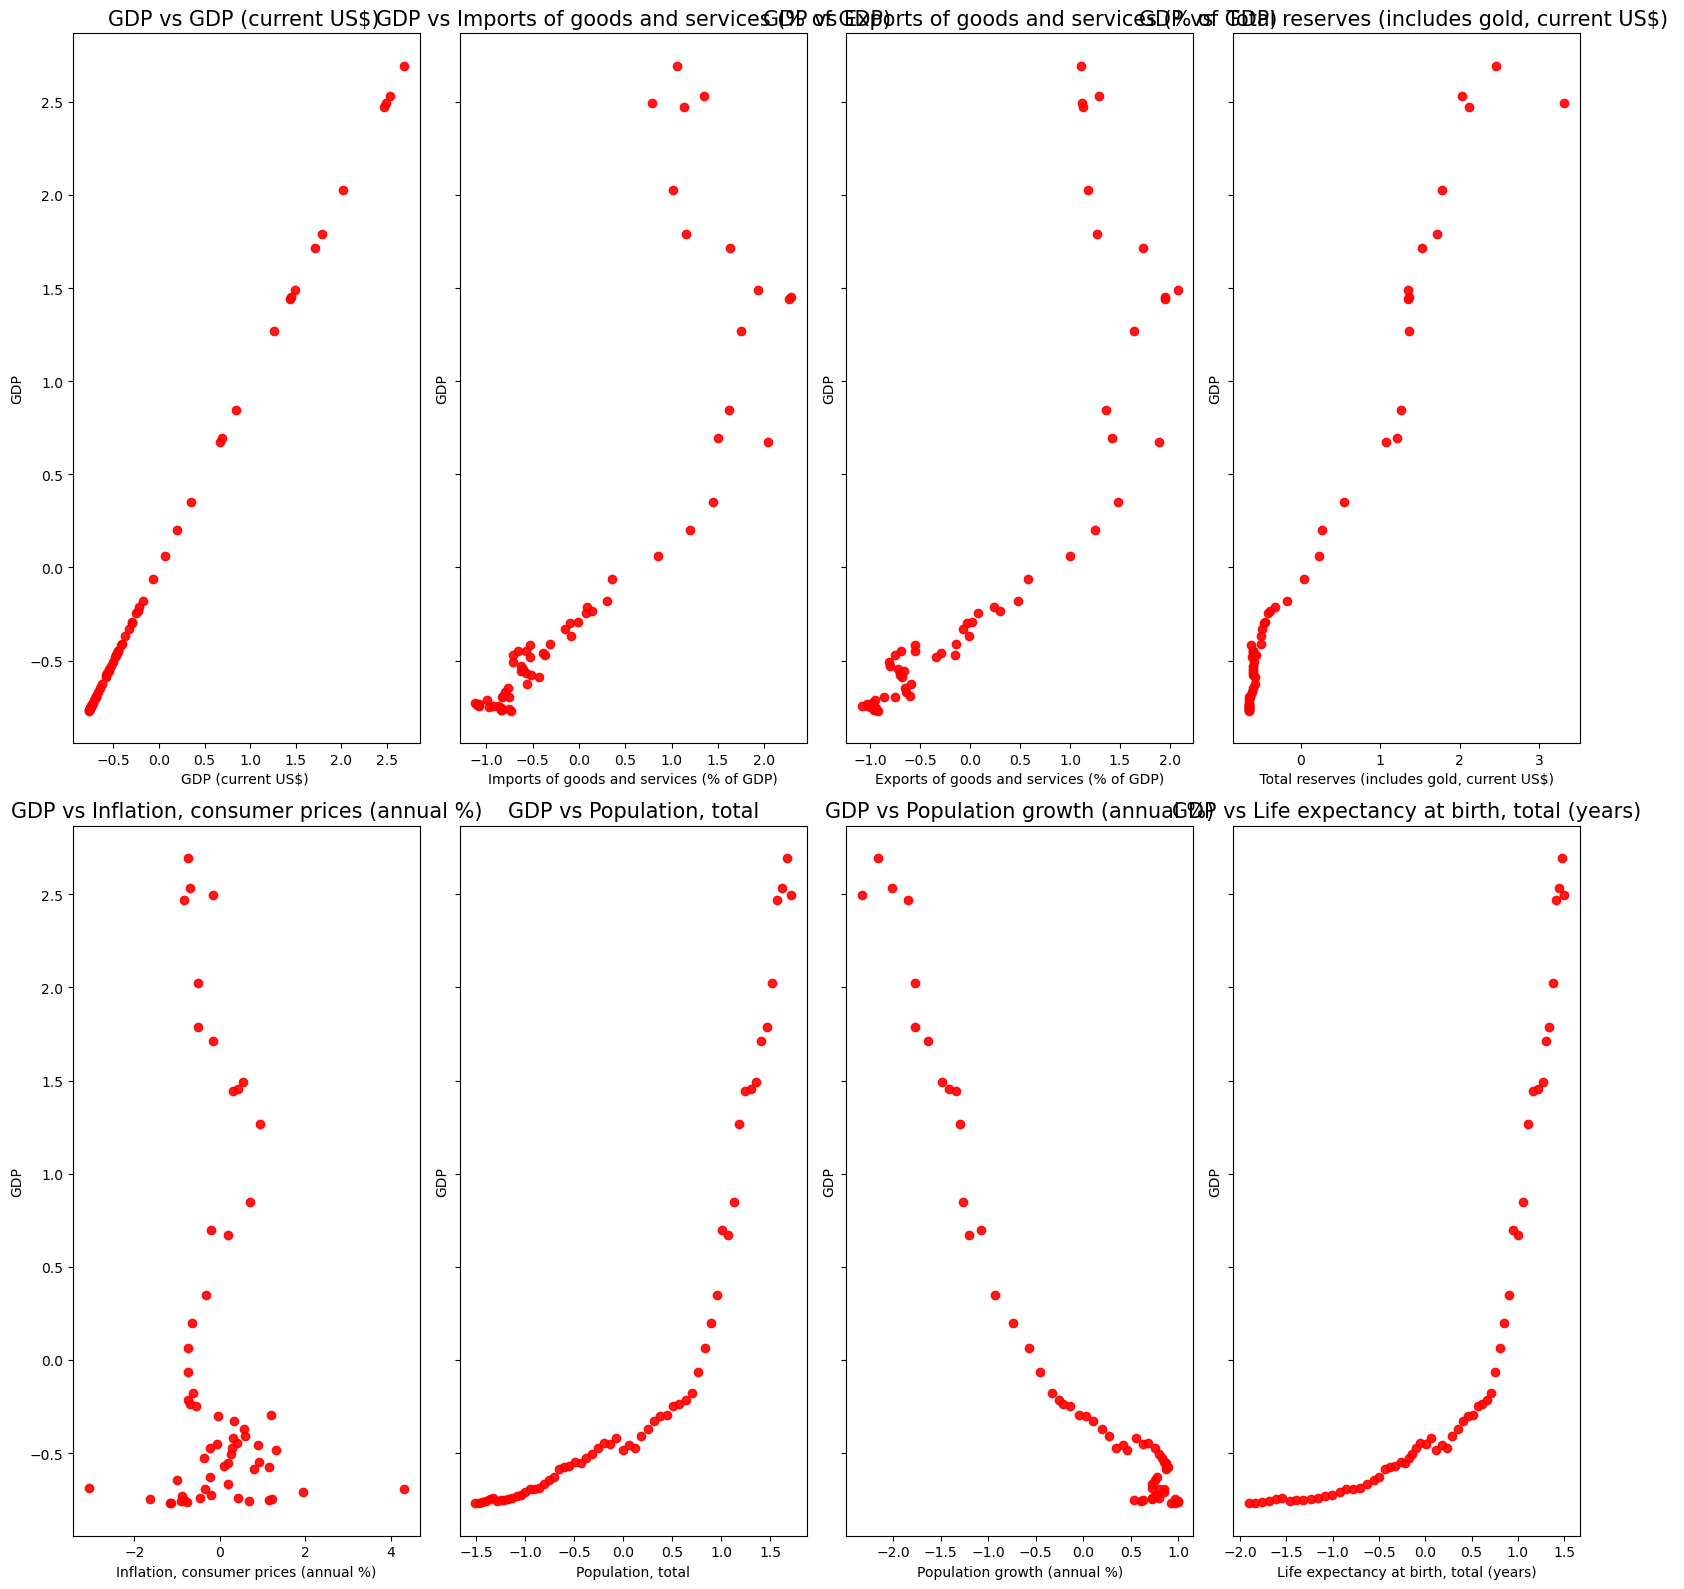

In [164]:
#Plotting subplots to visualize correlation between predictor & target variable
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,16), sharey=True )
for ax, column in zip(axes.flatten(), scaled_df.columns):
    ax.scatter(scaled_df[column], scaled_df['GDP (current US$) '], label=column, alpha=.9,color='red')
    ax.set_title(f'GDP vs {column}', fontsize=15)
    ax.set_xlabel(column)
    ax.set_ylabel('GDP')
fig.tight_layout()

In [165]:
df.corr()

,GDP (current US$),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
GDP (current US$),1.000000,0.836210,0.848055,0.980421,-0.105403,0.863622,-0.957579,0.804017
Imports of goods and services (% of GDP),0.836210,1.000000,0.989499,0.841134,-0.034099,0.894541,-0.912249,0.849597
Exports of goods and services (% of GDP),0.848055,0.989499,1.000000,0.851696,-0.073604,0.927934,-0.935063,0.886921
"Total reserves (includes gold, current US$)",0.980421,0.841134,0.851696,1.000000,-0.108049,0.835331,-0.957051,0.767991
"Inflation, consumer prices (annual %)",-0.105403,-0.034099,-0.073604,-0.108049,1.000000,-0.053939,0.123497,-0.014927
"Population, total",0.863622,0.894541,0.927934,0.835331,-0.053939,1.000000,-0.928431,0.987134
Population growth (annual %),-0.957579,-0.912249,-0.935063,-0.957051,0.123497,-0.928431,1.000000,-0.868766
"Life expectancy at birth, total (years)",0.804017,0.849597,0.886921,0.767991,-0.014927,0.987134,-0.868766,1.000000


# Detecting, Dealing & Visualizing Missing Values in Dataset

In [166]:
# Printing out the columns with missing values
[col for col in df.columns if df[col].isnull().any()]

[]

In [167]:
#Creating Function Returning Missing Values Table

def missing_values_table(df):
    mis_val = df.isnull().sum() #Total Missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df) #%ge of missing values
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) #creating missing values table
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}) #Rename columns
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1) # Sort table by %ge of missing descending
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.") #Print out Info

    return mis_val_table_ren_columns #Return the dataframe with missing information

In [168]:
#Missing Values dataframe
missing_df = missing_values_table(df)
missing_df

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Nil missing values 

In [169]:
#setting  X and y variables
X = df.drop(['GDP (current US$) '], axis=1)  # Change the column name to an existing column
y = df['GDP (current US$) '] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #performing train & test split
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Linear Regression Feature Importance

[ 8.51252552e+11 -1.21510732e+12  4.53775323e+11 -1.81259086e+10
  1.21019760e+11 -5.20974224e+11  7.53578900e+10]


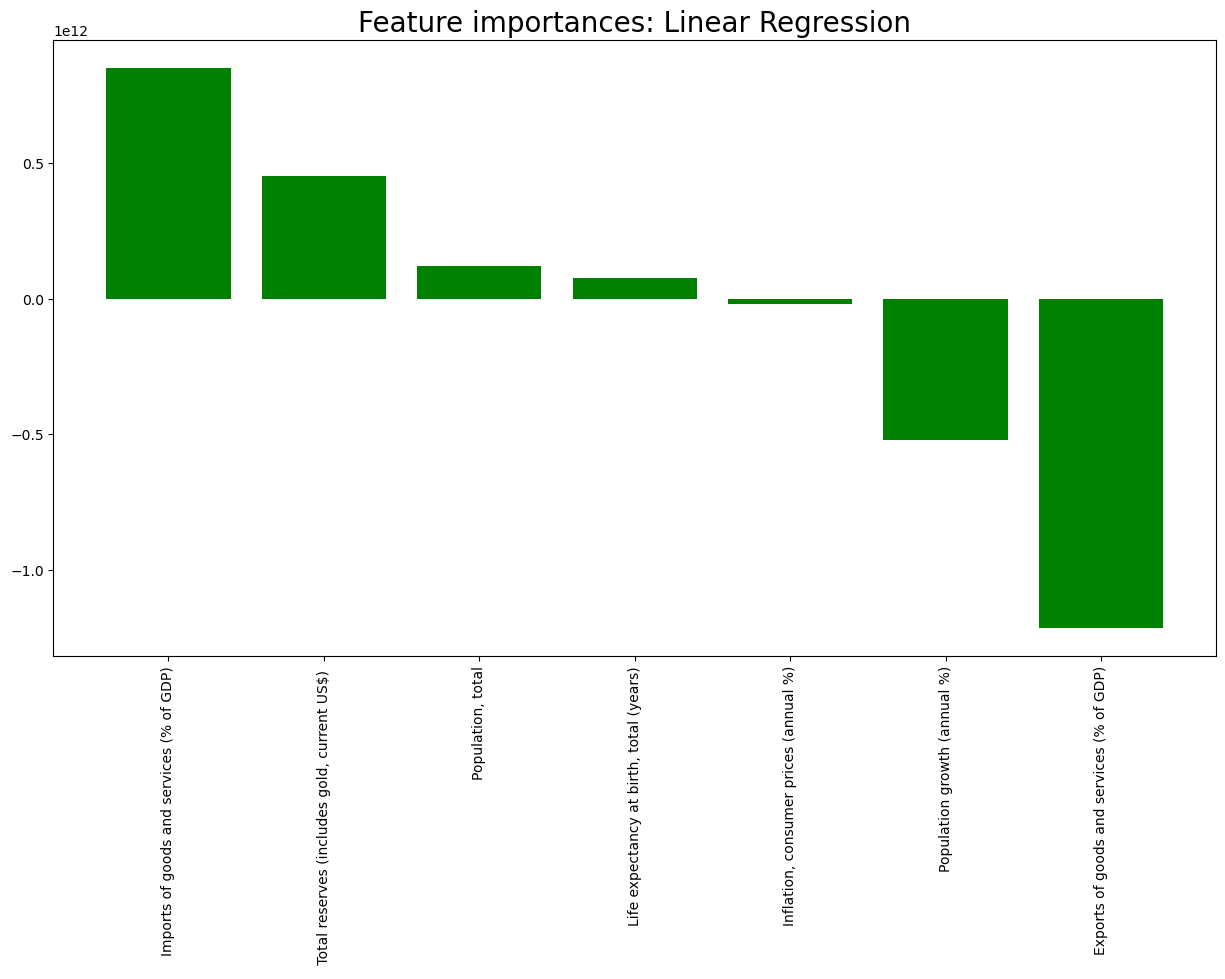

Model train accuracy: 0.98
Model test accuracy: 0.95


In [170]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': linreg.coef_
    })
importances = importances.sort_values(by='Importance', ascending=False)
print(linreg.coef_)

# visualization
plt.figure(figsize=(15,8))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='green')
plt.title('Feature importances: Linear Regression', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Accuracy Test
print(f"Model train accuracy: {linreg.score(X_train_scaled, y_train):.2f}")
print(f"Model test accuracy: {linreg.score(X_test_scaled, y_test):.2f}")

The model is slightly overfitting on both the training & test data. 

In [171]:
#Random Forest Feature Importance

[0.05186406 0.06448615 0.23533993 0.00526331 0.21701322 0.20204317
 0.22399015]


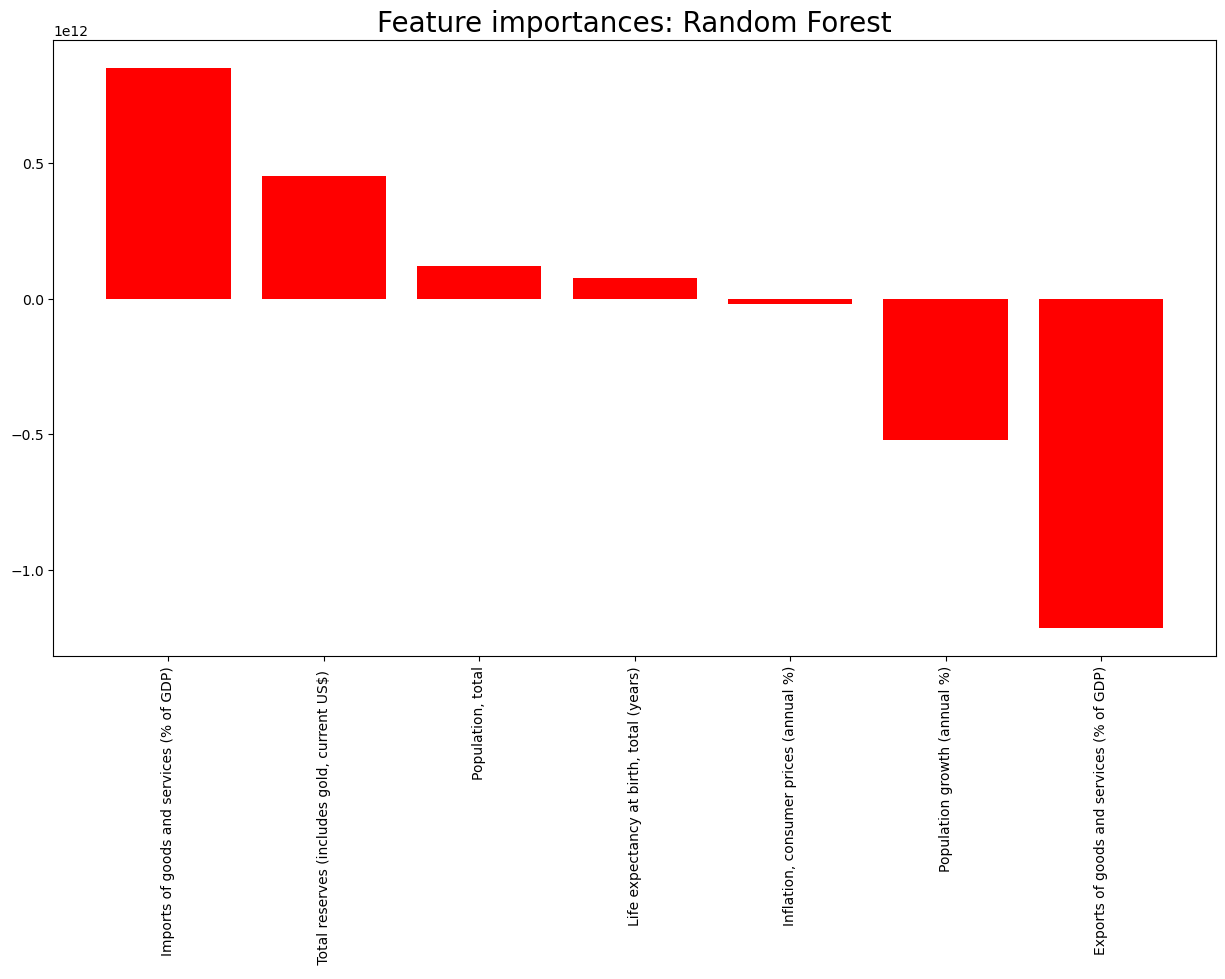

Model train accuracy: 1.00
Model test accuracy: 0.99


In [172]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
print(rf.feature_importances_)

# visualization
plt.figure(figsize=(15,8))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='red')
plt.title('Feature importances: Random Forest', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Accuracy Test
print(f"Model train accuracy: {rf.score(X_train_scaled, y_train):.2f}")
print(f"Model test accuracy: {rf.score(X_test_scaled, y_test):.2f}")

# Time Series Analysis

In [173]:
#Checking trends of predictor varioables & top predictors
trends = df[['GDP (current US$) ','Imports of goods and services (% of GDP)','Exports of goods and services (% of GDP)',
       ' Total reserves (includes gold, current US$) ', 'Population, total',
       'Life expectancy at birth, total (years)']]

In [174]:
#Scaling data set
scaler = StandardScaler()
scaled_trends = scaler.fit_transform(trends)
scaled_trends_df = pd.DataFrame(scaled_trends, columns = trends.columns)

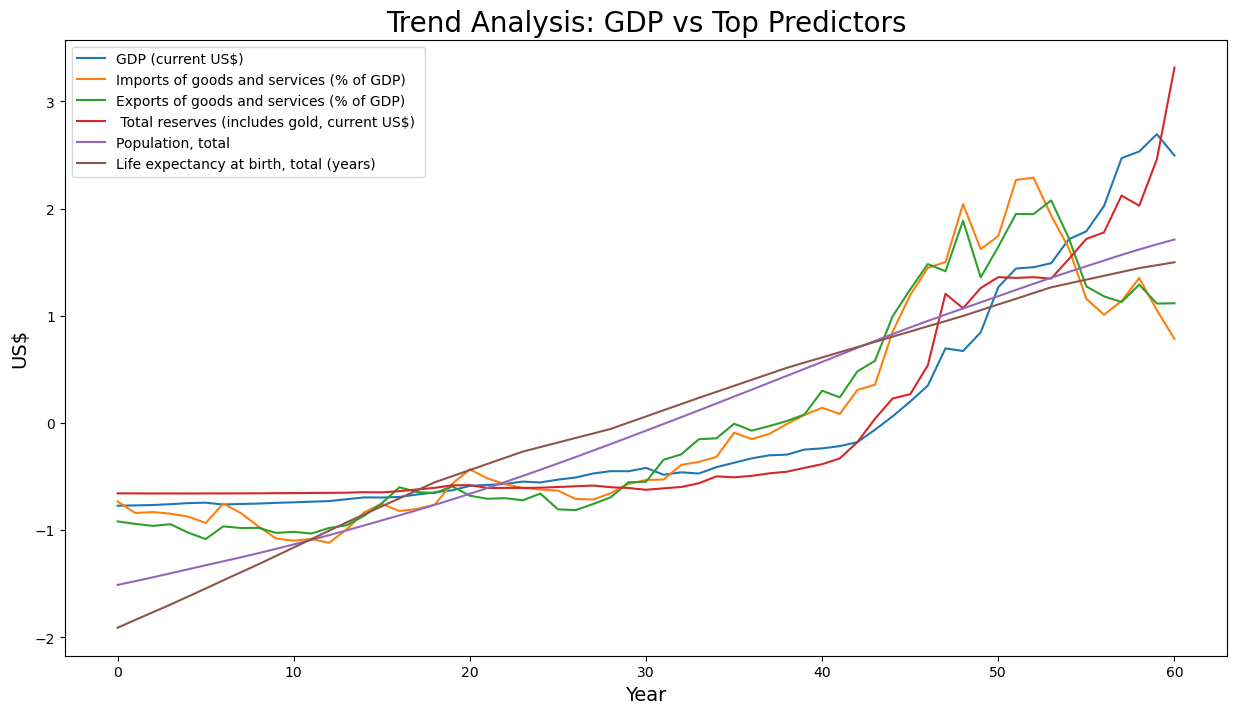

In [175]:
scaled_trends_df.plot(figsize=(15,8))
plt.title('Trend Analysis: GDP vs Top Predictors', fontsize=20)
plt.ylabel('US$', fontsize=14)
plt.xlabel('Year', fontsize=14);

In [176]:
scaled_trends_df.corr()

,GDP (current US$),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Population, total","Life expectancy at birth, total (years)"
GDP (current US$),1.000000,0.836210,0.848055,0.980421,0.863622,0.804017
Imports of goods and services (% of GDP),0.836210,1.000000,0.989499,0.841134,0.894541,0.849597
Exports of goods and services (% of GDP),0.848055,0.989499,1.000000,0.851696,0.927934,0.886921
"Total reserves (includes gold, current US$)",0.980421,0.841134,0.851696,1.000000,0.835331,0.767991
"Population, total",0.863622,0.894541,0.927934,0.835331,1.000000,0.987134
"Life expectancy at birth, total (years)",0.804017,0.849597,0.886921,0.767991,0.987134,1.000000


In [177]:
trends_diff = scaled_trends_df.diff(periods=1)

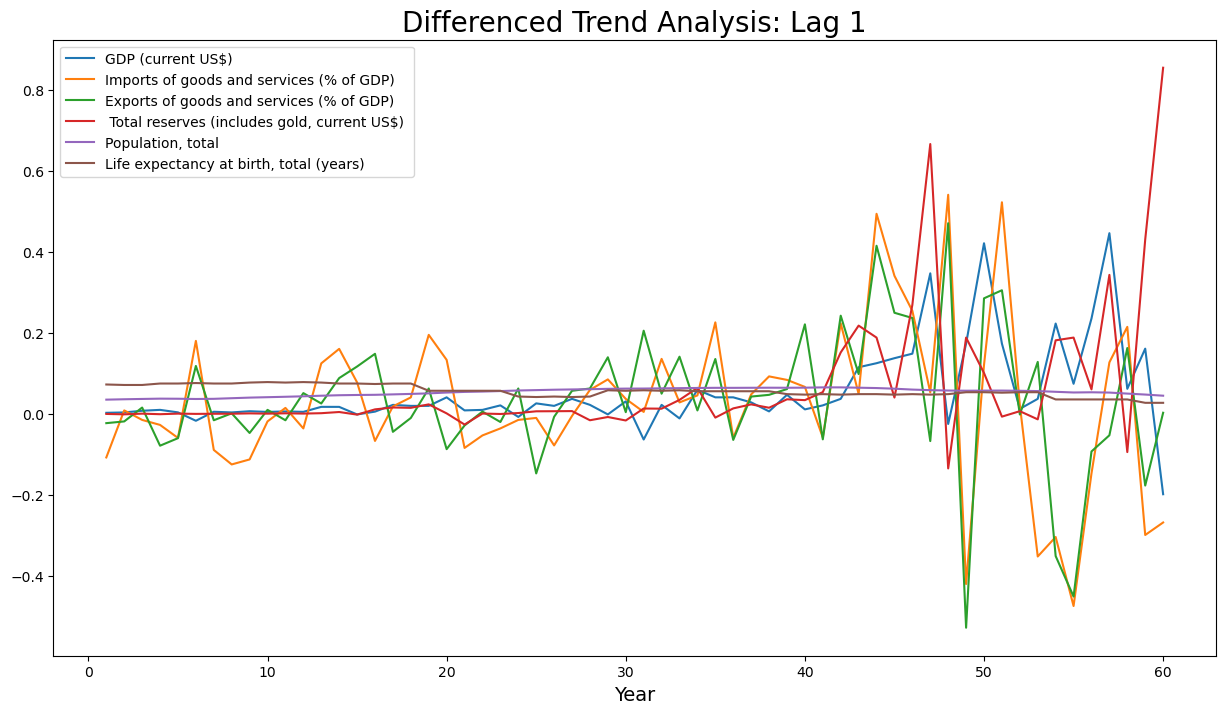

In [178]:
trends_diff.plot(figsize=(15,8))
plt.title('Differenced Trend Analysis: Lag 1', fontsize=20)
plt.xlabel('Year', fontsize=14);

In [179]:
trends_diff.corr()

,GDP (current US$),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Population, total","Life expectancy at birth, total (years)"
GDP (current US$),1.000000,0.084293,-0.098763,0.312888,0.204945,-0.351813
Imports of goods and services (% of GDP),0.084293,1.000000,0.800522,-0.247143,0.258056,0.074697
Exports of goods and services (% of GDP),-0.098763,0.800522,1.000000,-0.218729,0.240791,0.073358
"Total reserves (includes gold, current US$)",0.312888,-0.247143,-0.218729,1.000000,0.050680,-0.477568
"Population, total",0.204945,0.258056,0.240791,0.050680,1.000000,-0.591399
"Life expectancy at birth, total (years)",-0.351813,0.074697,0.073358,-0.477568,-0.591399,1.000000


Focusing predicting target series (GDP)

In [180]:
data = df['GDP (current US$) ']

Visualizing timeseries data: Plotting line plot to assist get a sense of how the time series dataset changes over time.

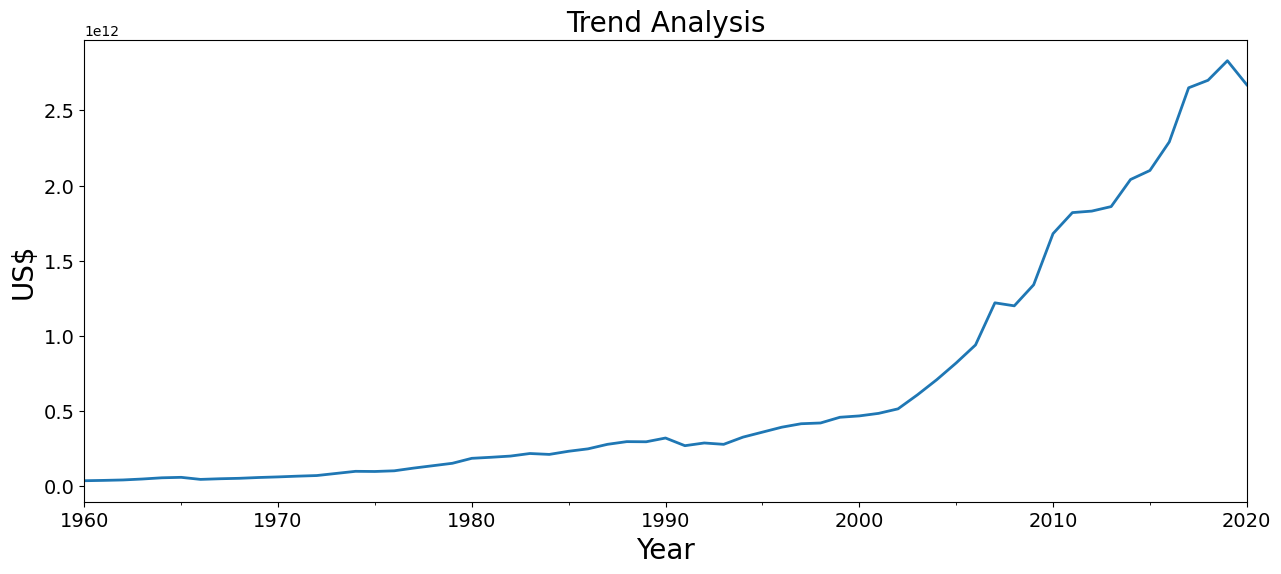

In [181]:
#Line plot to visualize trend
data.plot(figsize = (15,6), linewidth=2, fontsize=14)
plt.ylabel('US$', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks
plt.title('Trend Analysis', fontsize=20)
plt.show();

Time Series Decomposition: Decompose the time series into 3 distinct components: Trend, Seasonality & Residual(Noise); making it easier to quickly identify changing mean or variation of the time series.

In [182]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose

In [183]:
series = df

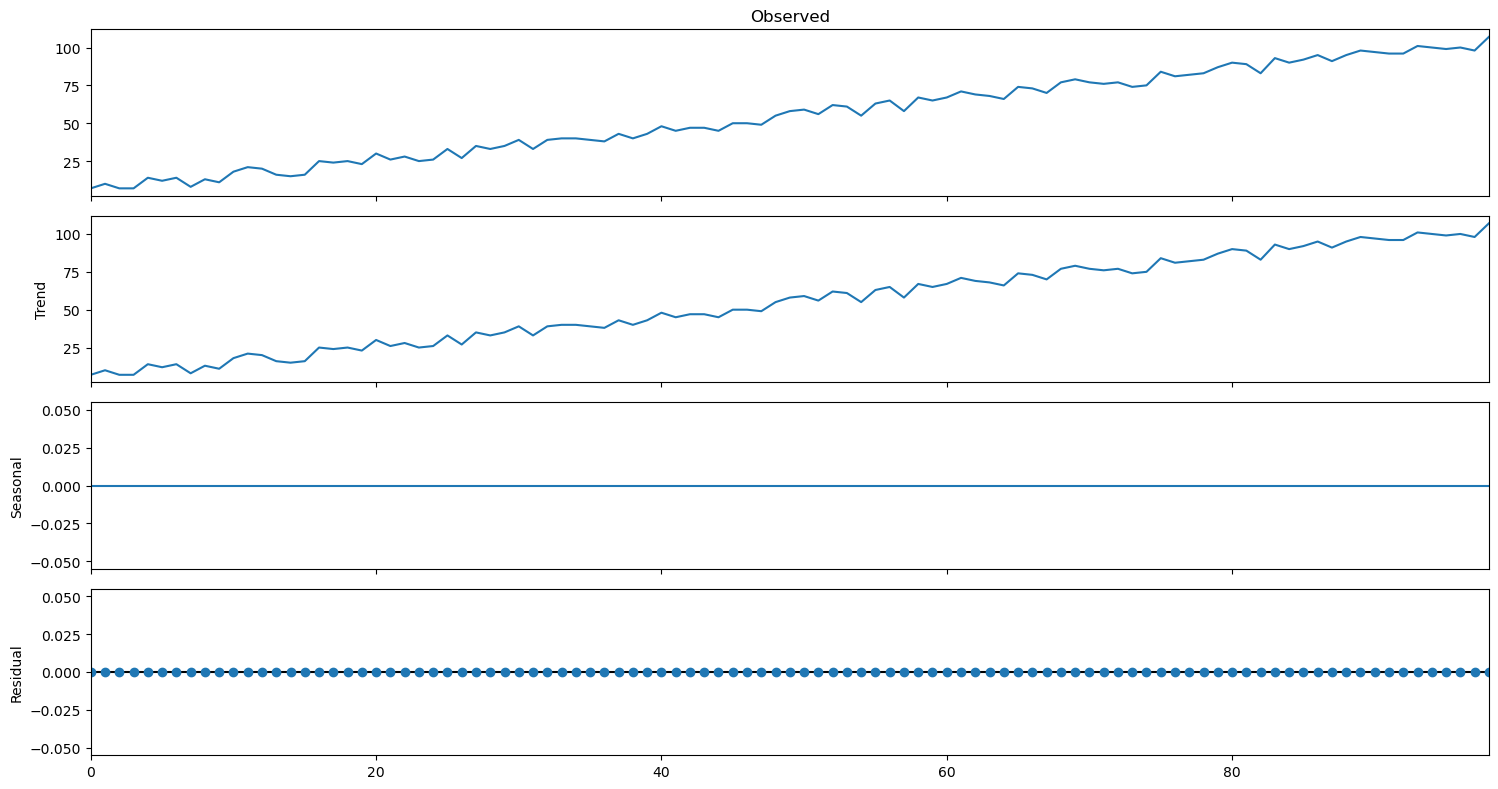

In [184]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

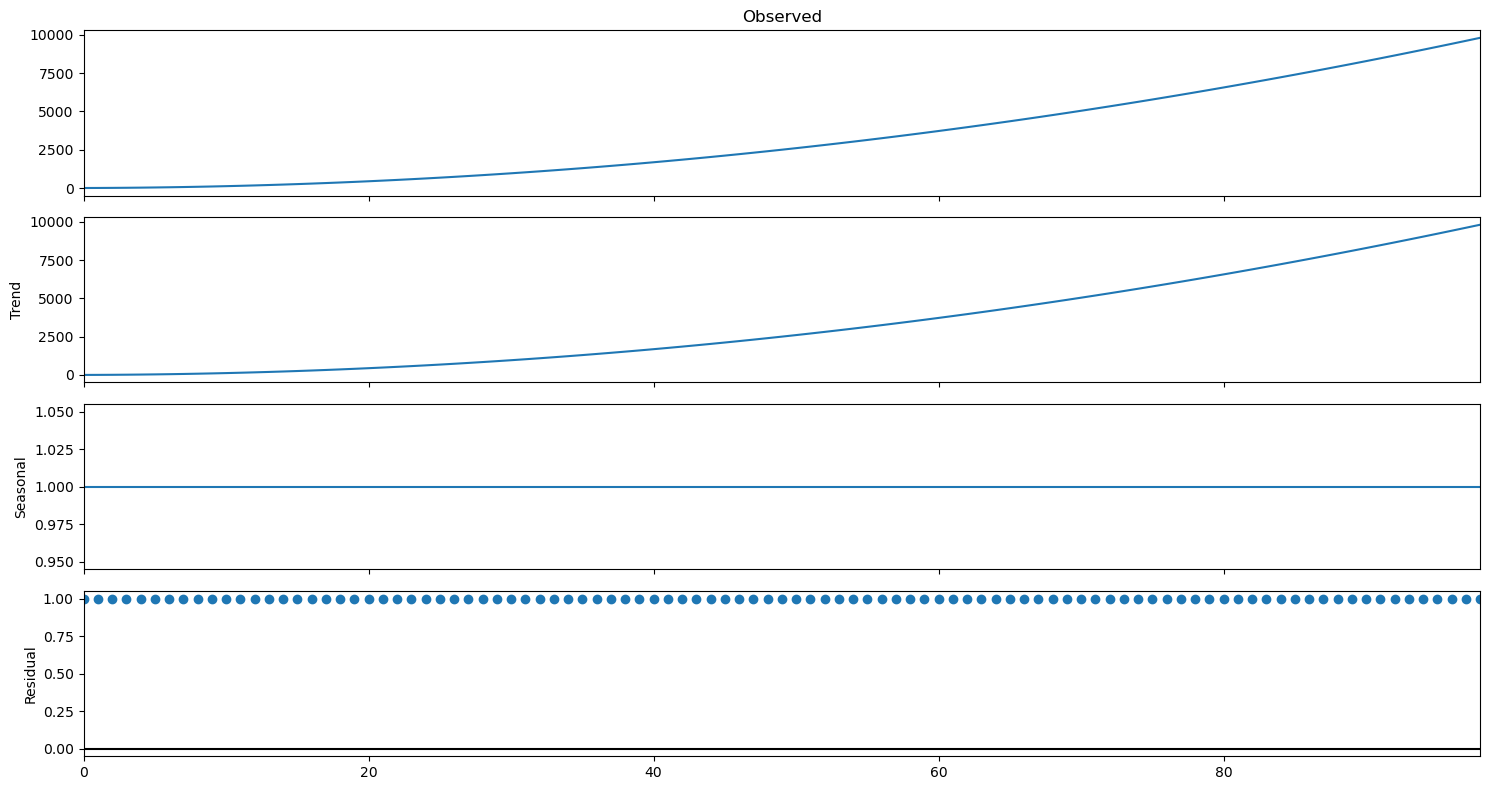

In [185]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

The plot above clearly shows that GDP is stable (upward trend), along with no visible seasonality/residuals (Nature of data points )

# Time Series Stationarity Check

In [186]:
def stationarity_check(data):

    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    # Calculate rolling statistics
    roll_mean = data.rolling(window=8, center=False).mean()
    roll_std = data.rolling(window=8, center=False).std()

    # Perform the Dickey Fuller Test
    dftest = adfuller(data)

    # Plot rolling statistics:
    fig = plt.figure(figsize=(15,8))
    plt.plot(data, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation', fontsize = 20)
    plt.show(block=False)

    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    return None

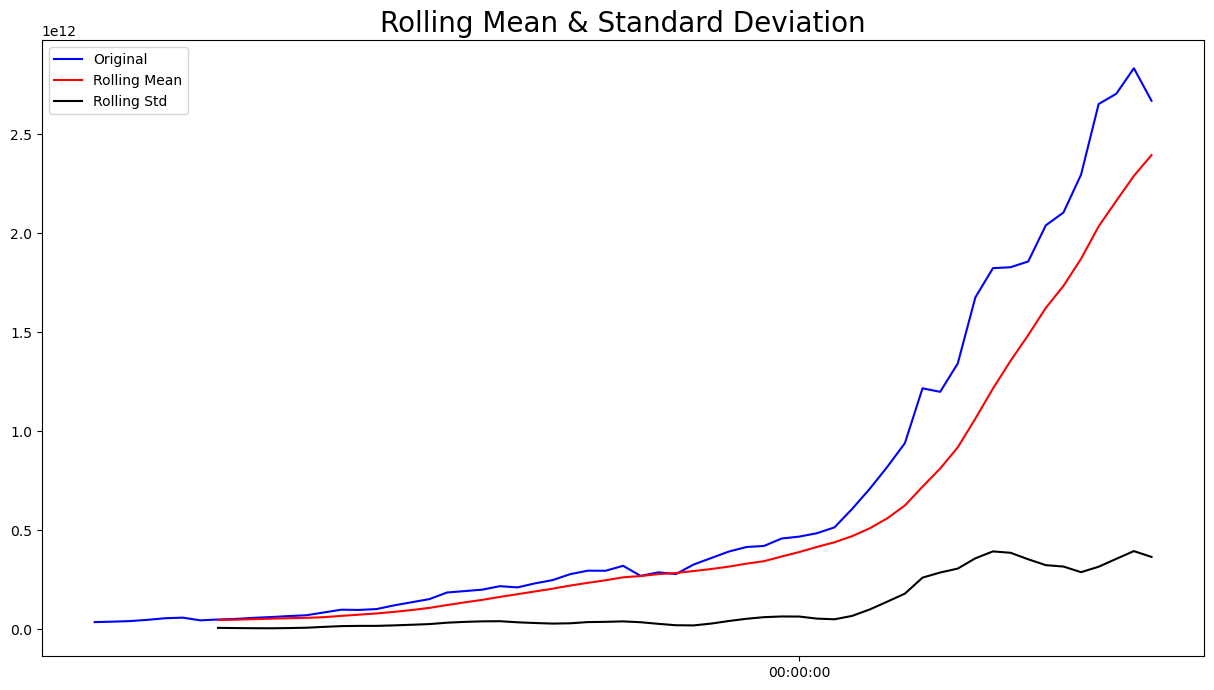

Results of Dickey-Fuller Test: 

Test Statistic                 -0.988878
p-value                         0.757299
#Lags Used                      7.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


In [38]:
stationarity_check(data)

Pvalue >0.05 & Test Statistic also greater than critical value (5%);

Time series NOT Stationary

# Differencing

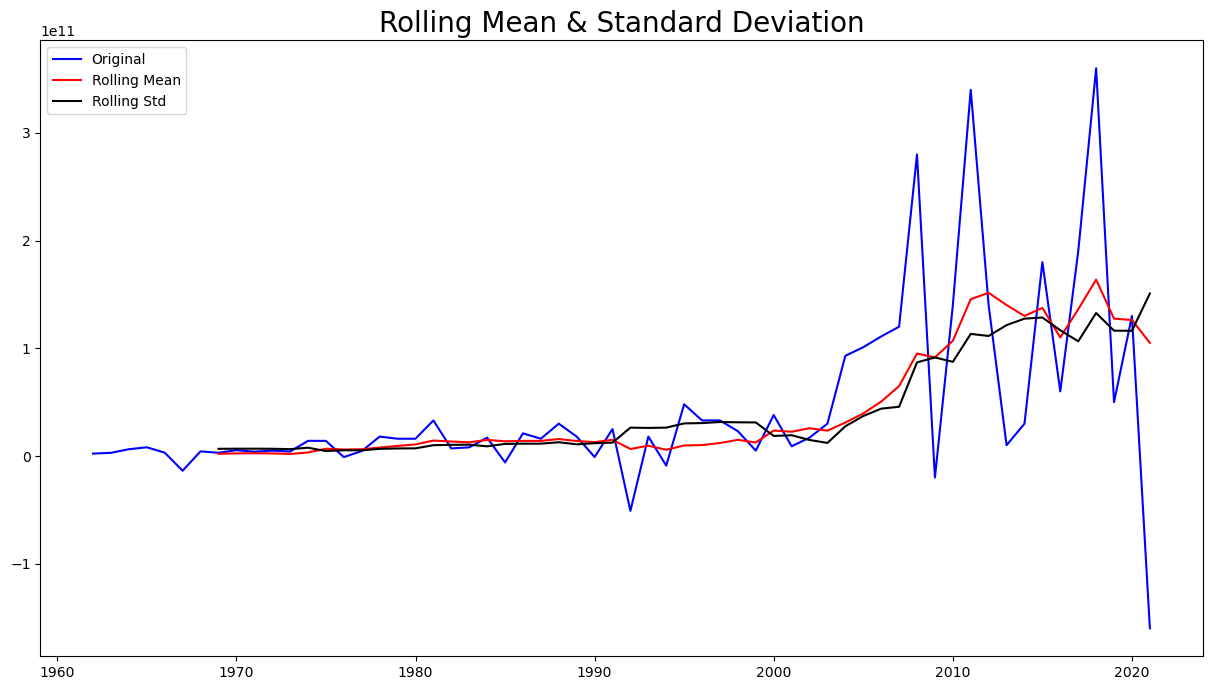

Results of Dickey-Fuller Test: 

Test Statistic                  0.592413
p-value                         0.987427
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [187]:
# Difference_data
diff_1 = data.diff(periods=1)

# Drop the missing values
diff_1.dropna(inplace=True)

# Performing the stationarity check
stationarity_check(diff_1)

Time series NOT Stationary; pvalue > 0.05

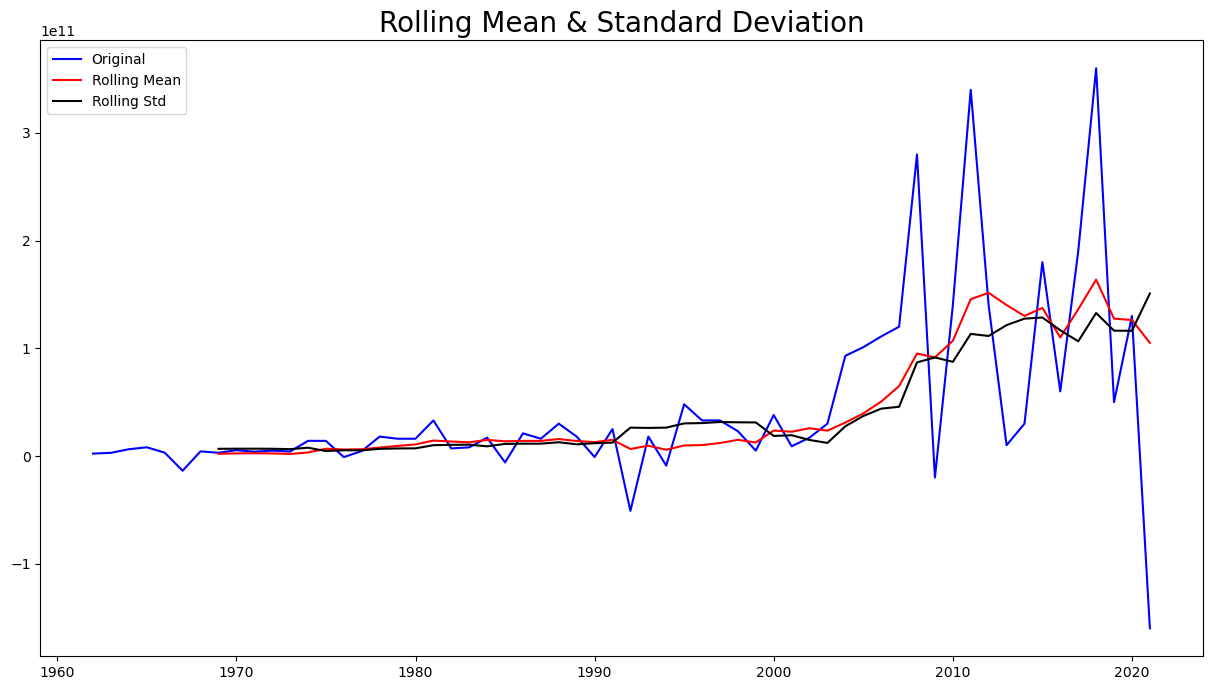

Results of Dickey-Fuller Test: 

Test Statistic                  0.592413
p-value                         0.987427
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [188]:
# Difference our data
diff_1 = data.diff(periods=1)

# Drop the missing values
diff_1.dropna(inplace=True)

# Performing the stationarity check
stationarity_check(diff_1)

Time series NOT Stationary; pvalue > 0.05

# log and square root transform

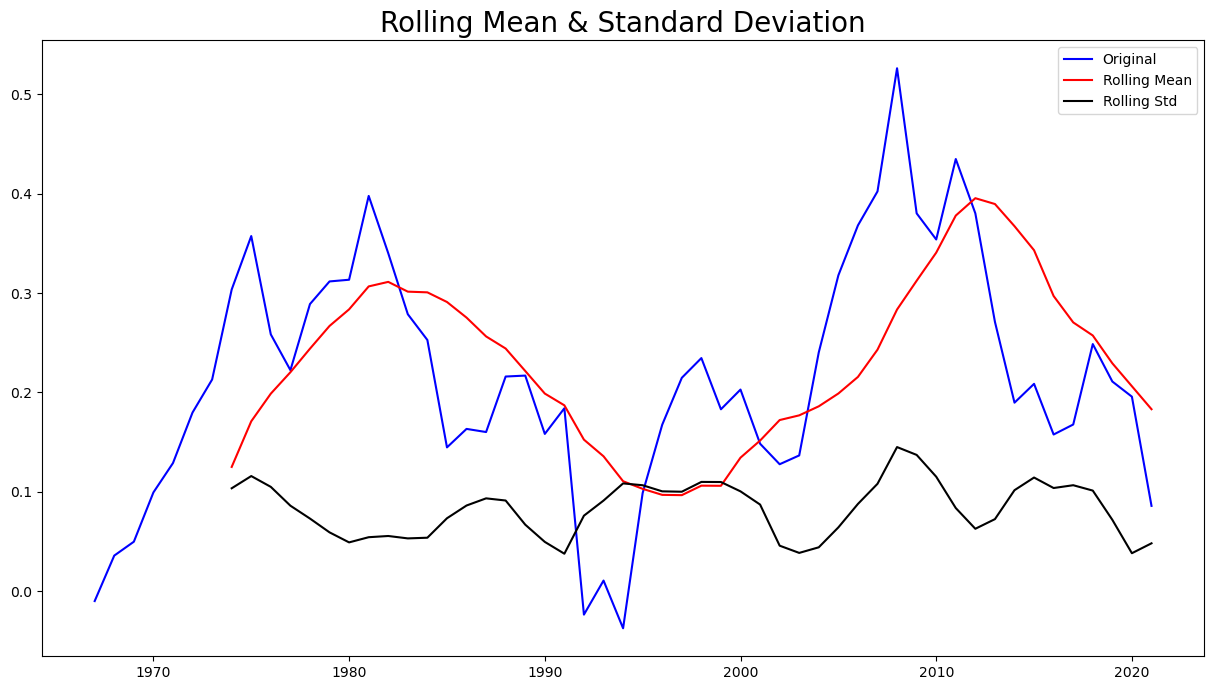

Results of Dickey-Fuller Test: 

Test Statistic                 -2.221594
p-value                         0.198502
#Lags Used                      7.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [189]:
# log transform
data_log = np.log(data)

# Square root transform
data_sqrt = np.sqrt(data)

# Subtracting rolling mean, with time window of 7
roll_mean = np.log(data).rolling(window=7).mean()

# Subtract the moving average from the log transformed data
data_minus_roll_mean = np.log(data) - roll_mean

# Dropping the missing values from dataset
data_minus_roll_mean.dropna(inplace=True)

# Performing stationarity Check
stationarity_check(data_minus_roll_mean)


Time series NOT Stationary; pvalue > 0.05

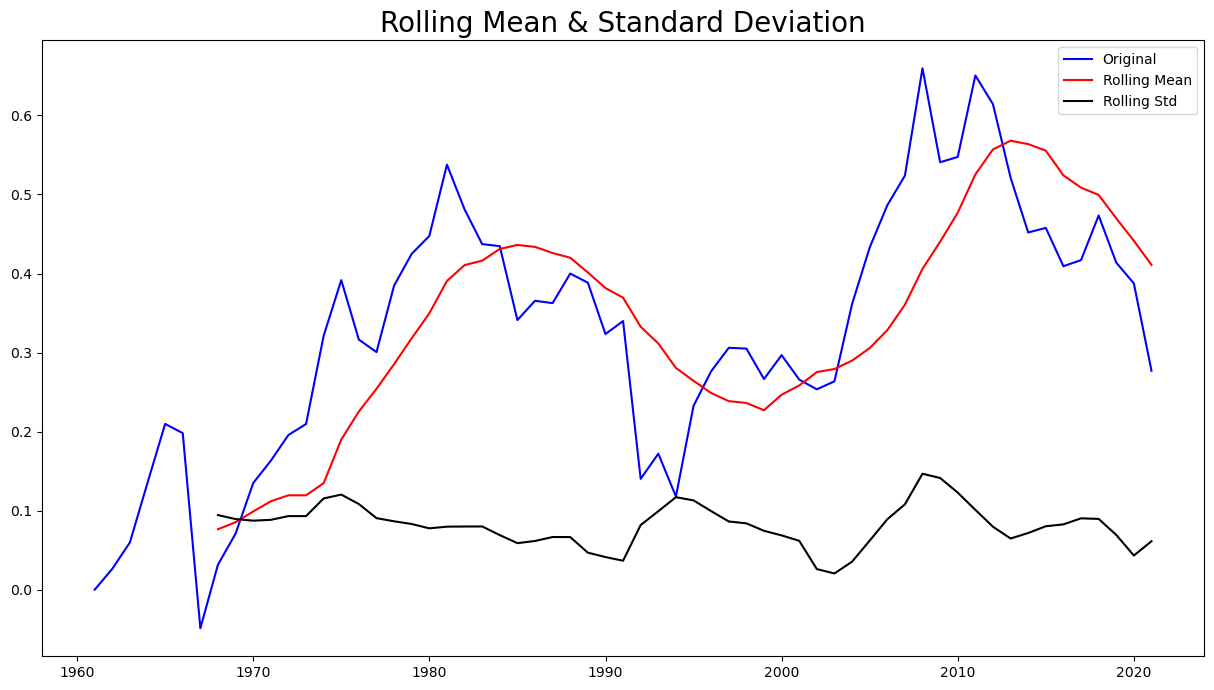

Results of Dickey-Fuller Test: 

Test Statistic                 -2.369964
p-value                         0.150394
#Lags Used                      0.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [190]:
# Calculate Weighted Moving Average of log transformed data
exp_roll_mean = np.log(data).ewm(halflife=4).mean()

# Subtract the exponential weighted rolling mean from the original data
data_minus_exp_roll_mean =  np.log(data) - exp_roll_mean

# Performing stationarity check
stationarity_check(data_minus_exp_roll_mean)

Time series NOT Stationary; pvalue > 0.05

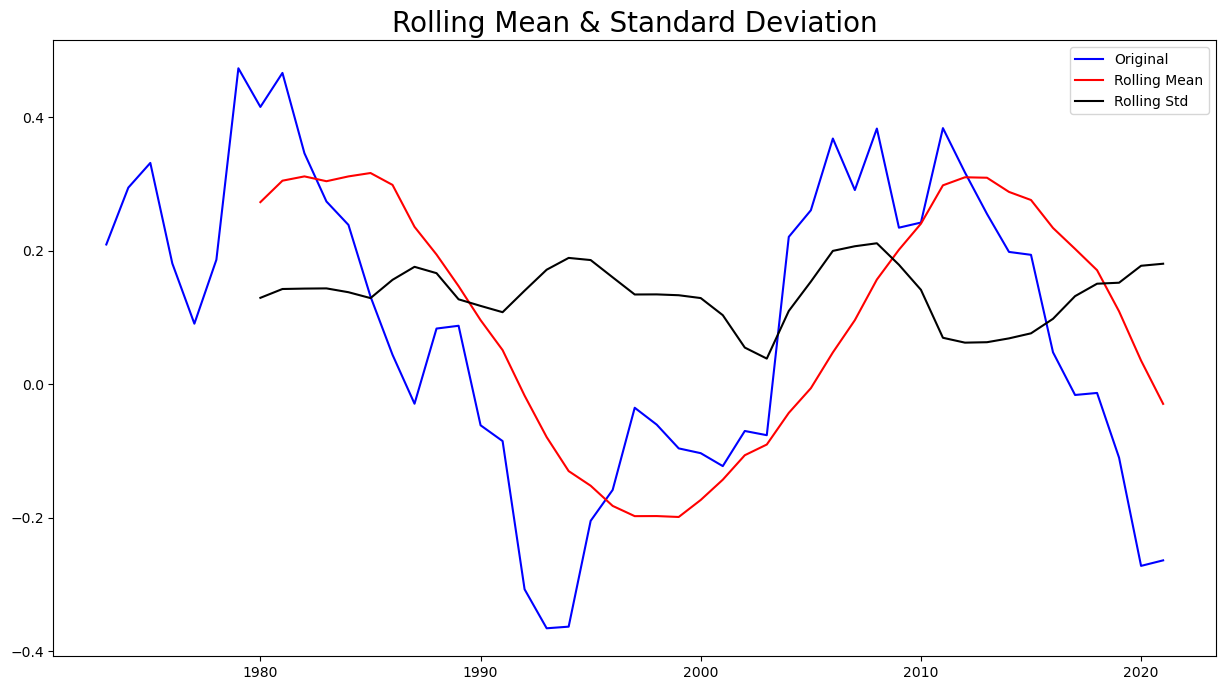

Results of Dickey-Fuller Test: 

Test Statistic                 -5.138285
p-value                         0.000012
#Lags Used                     11.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [191]:
# Difference our data
data_diff = data_minus_exp_roll_mean.diff(periods=12)

# Drop the missing values
data_diff.dropna(inplace=True)

# Performing the stationarity check
stationarity_check(data_diff)

Time series Stationary; pvalue < 0.05

# ACF & PACF Plots

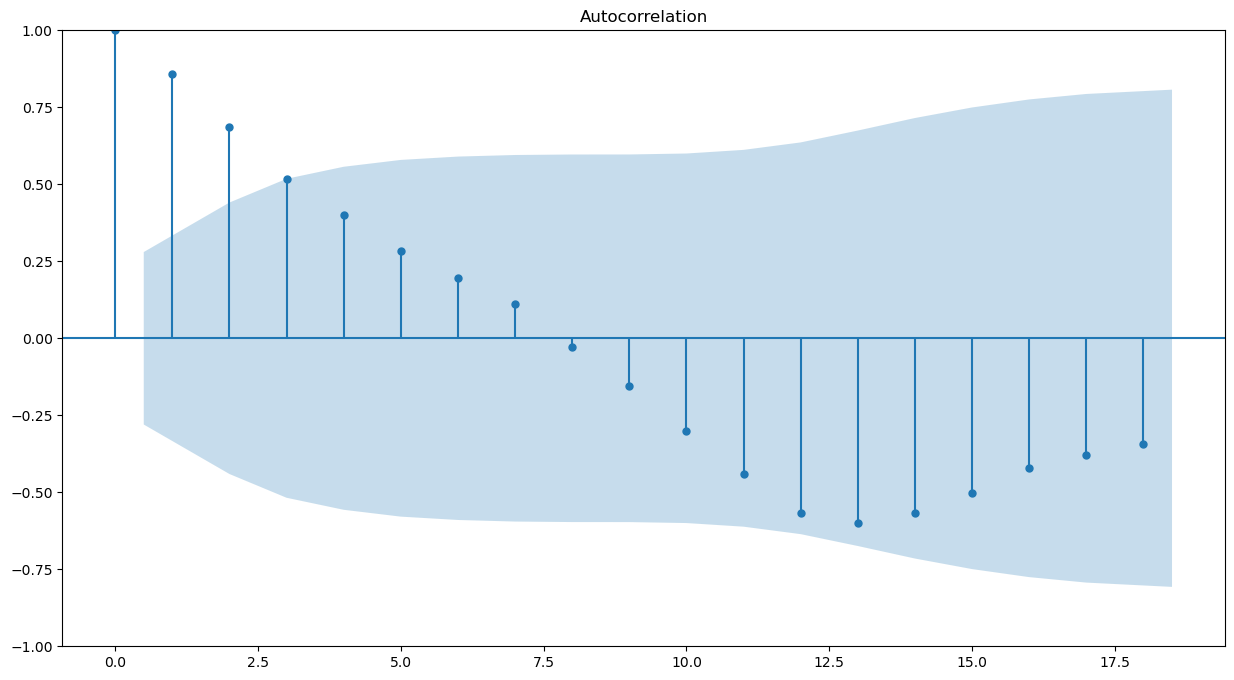

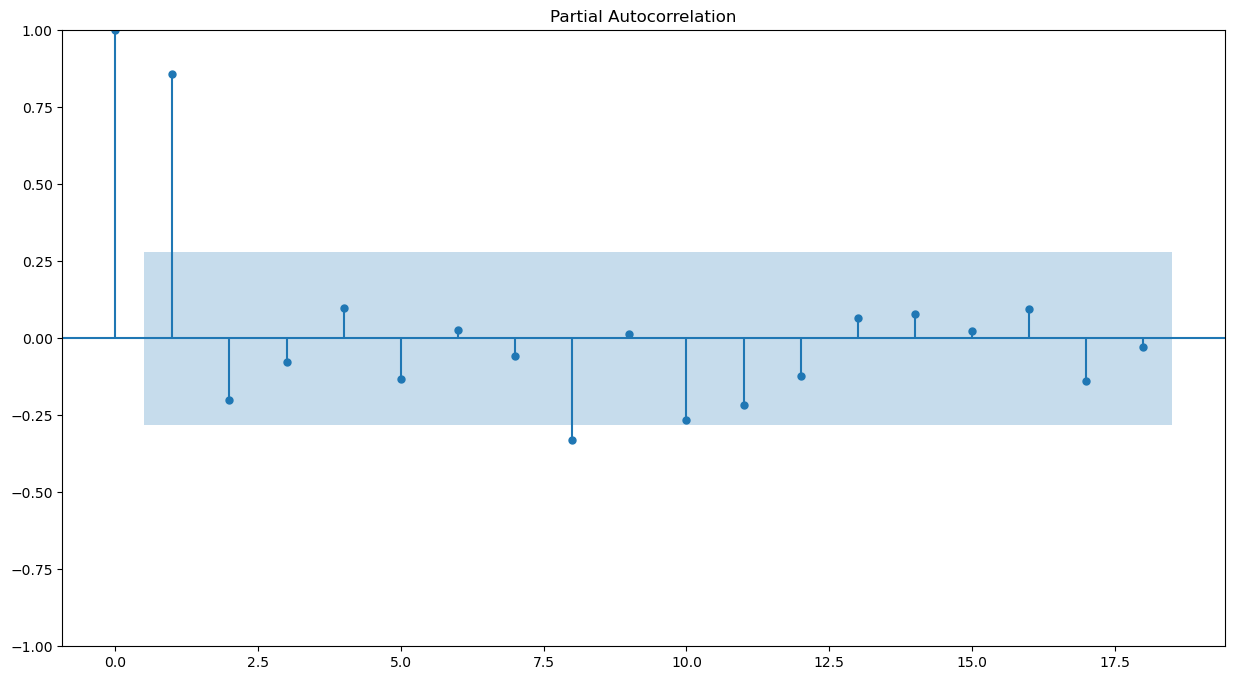

In [192]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 8

plot_acf(data_diff, lags=18);

plot_pacf(data_diff, lags=18);

# Auto-Regressive Model

In [195]:
 import datetime

In [197]:
from datetime import datetime

                            AutoReg Model Results                             
Dep. Variable:     GDP (current US$)    No. Observations:                   49
Model:                    AutoReg(18)   Log Likelihood                  50.503
Method:               Conditional MLE   S.D. of innovations              0.047
Date:                Fri, 16 Feb 2024   AIC                            -61.007
Time:                        12:13:18   BIC                            -32.327
Sample:                    12-31-1990   HQIC                           -51.658
                         - 12-31-2020                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0519      0.020      2.641      0.008       0.013       0.090
GDP (current US$) .L1      0.4535      0.176      2.584      0.010       0.110       0.798
GDP 

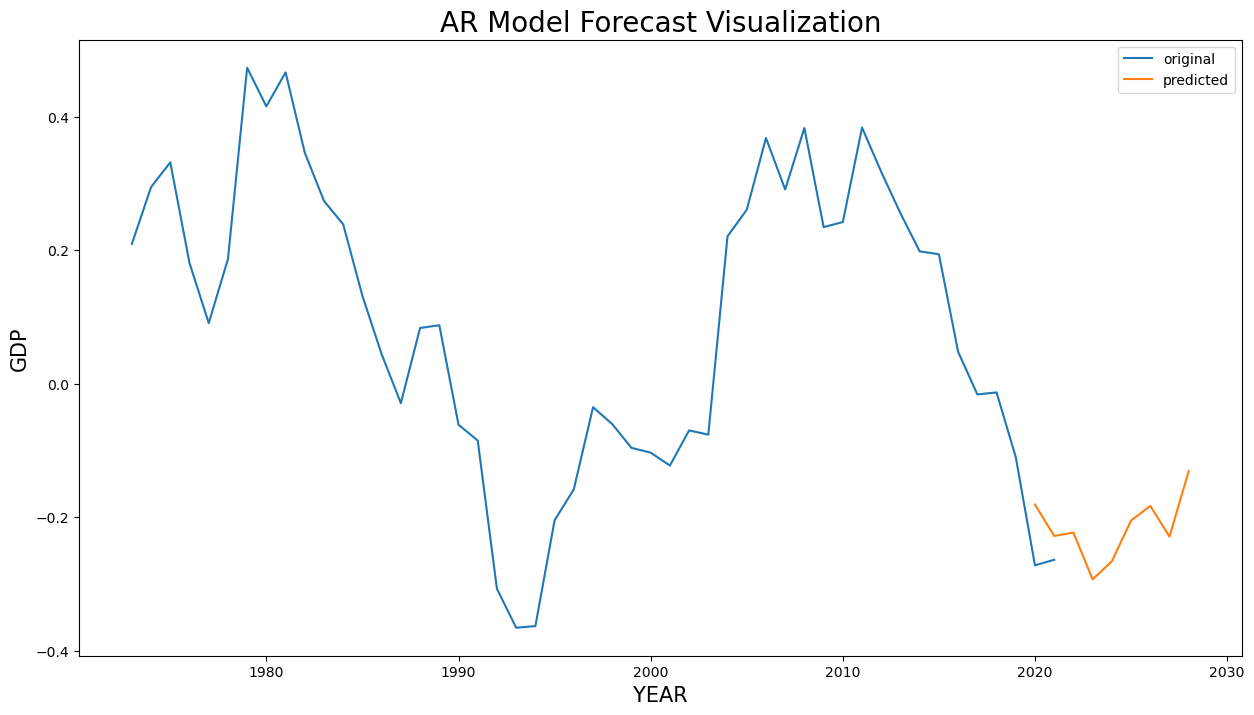

In [198]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

autoreg = AutoReg(data_diff, lags=18) # Instantiate model
autoreg_fit = autoreg.fit() # Fit Model
print(autoreg_fit.summary()) # Print summary

# predict
start_index = datetime(2019, 12, 31)
end_index = datetime(2027, 12, 31)
forecast = autoreg_fit.predict(start=start_index, end=end_index)
print(forecast)


# visualization
plt.figure(figsize=(15,8))
plt.plot(data_diff.index,data_diff,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("AR Model Forecast Visualization",fontsize=20)
plt.xlabel("YEAR",fontsize=15)
plt.ylabel("GDP",fontsize=15)
plt.legend()
plt.show()

Checking accuracy of the model

MSE: 0.141
MAE: 0.327


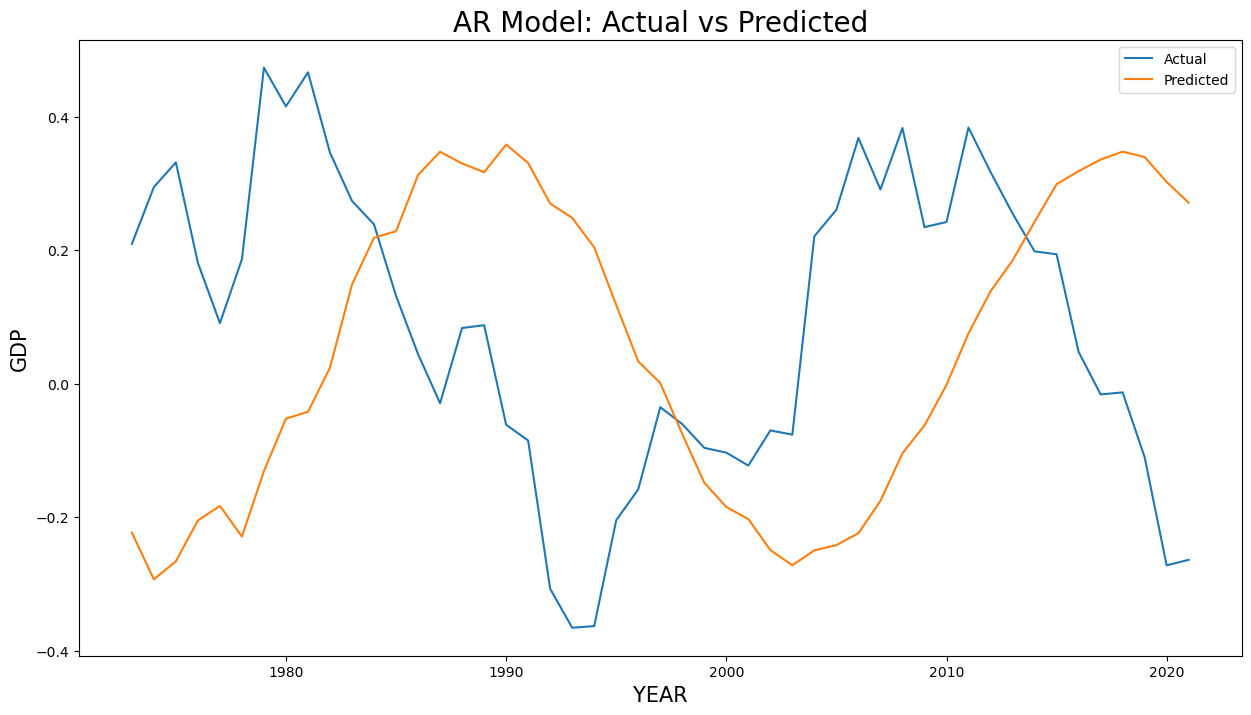

In [199]:
predictions = autoreg_fit.predict(start=len(data_diff), end=len(data_diff)+len(data_diff)-1, dynamic=False) # Predictions
mse = mean_squared_error(data_diff, predictions) # MSE score
mae = mean_absolute_error(data_diff, predictions) # MAE score

print('MSE: %.3f' % mse)
print('MAE: %.3f' % mae)

# Plot actual and predicted values
fig= plt.subplots(figsize=(15,8))
plt.plot(data_diff.index, data_diff, label='Actual')
plt.plot(data_diff.index, predictions, label='Predicted')
plt.title("AR Model: Actual vs Predicted",fontsize=20)
plt.xlabel("YEAR",fontsize=15)
plt.ylabel("GDP",fontsize=15)
plt.legend()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

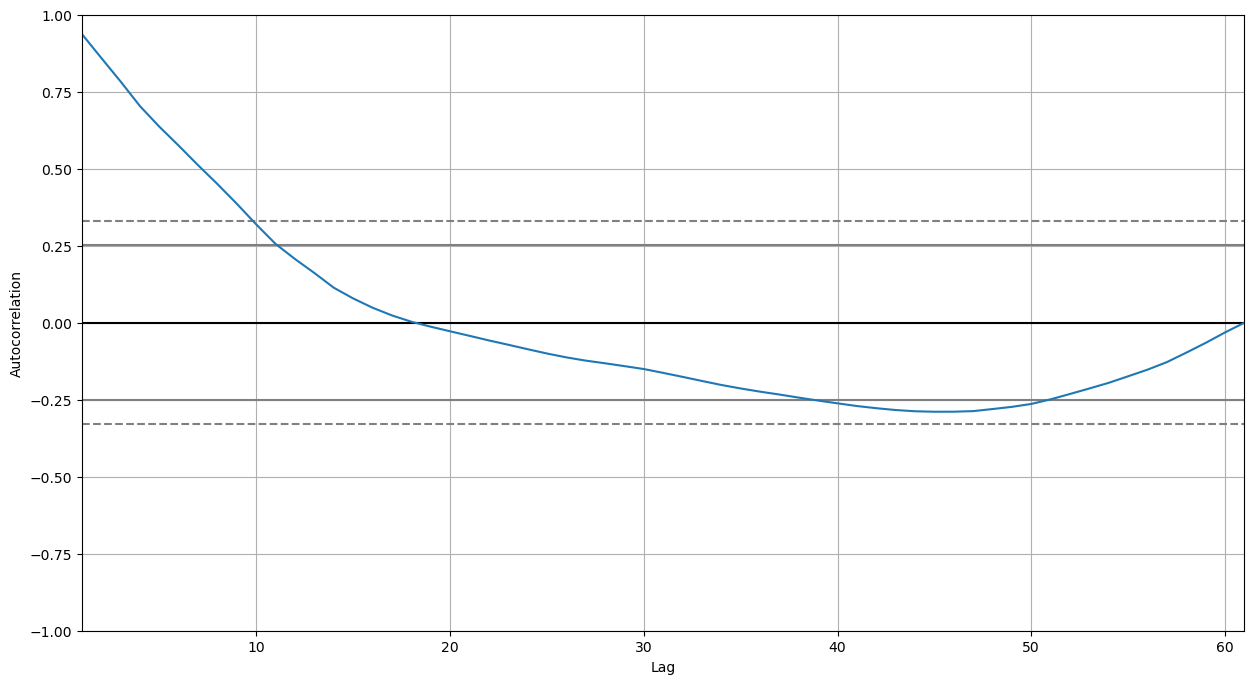

In [200]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['GDP (current US$) '])

# ARIMA Model 

In [48]:
# fitting a model with p=2, d=10, and q=2:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


model = ARIMA(data_diff, order=(2,10,2)) 
model_fit = model.fit() 
print(model_fit.summary()) 

C:\Users\priya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\priya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\priya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\priya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:     GDP (current US$)    No. Observations:                   49
Model:                ARIMA(2, 10, 2)   Log Likelihood                 -80.354
Date:                Fri, 16 Feb 2024   AIC                            170.708
Time:                        11:34:59   BIC                            179.026
Sample:                    01-01-1970   HQIC                           173.692
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6546      0.108    -15.344      0.000      -1.866      -1.443
ar.L2         -0.8104      0.104     -7.801      0.000      -1.014      -0.607
ma.L1         -1.9523      1.704     -1.146      0.2

AIC and BIC values are relatively low, which suggests that the model fits the data well.

In [203]:
from datetime import datetime  # Import the datetime module

# Create a date object
start_index = datetime(2017, 12, 31)
end_index = datetime(2030, 12, 31)


In [204]:
# predict
forecast = model_fit.predict(start=start_index, end=end_index)
print(forecast)

# visualization
plt.figure(figsize=(15,8))
plt.plot(data_diff.index,data_diff,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("ARIMA Model Forecast Visualization",fontsize=20)
plt.xlabel("YEAR",fontsize=15)
plt.ylabel("GDP",fontsize=15)
plt.legend()
plt.show()

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

In [205]:
model = ARIMA(df['GDP (current US$) '], order=(2,10,2))
model_fit = model.fit()


In [206]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     GDP (current US$)    No. Observations:                   61
Model:                ARIMA(2, 10, 2)   Log Likelihood               -1504.136
Date:                Fri, 16 Feb 2024   AIC                           3018.272
Time:                        12:23:59   BIC                           3027.931
Sample:                    12-31-1960   HQIC                          3021.963
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4839      0.190     -7.821      0.000      -1.856      -1.112
ar.L2         -0.8625      0.184     -4.686      0.000      -1.223      -0.502
ma.L1         -1.8905      0.319     -5.921      0.000      -2.516      -1.265
ma.L2          0.9282      0.438      2.118      0.034       0.069       1.787
sigma2      4.517e+24   7.45e-26   6.06e+49      0.000    4.52e+24    4.52e+24
===================================================================================
Ljung-Box (L1) (Q):                  11.22   Jarque-Bera (JB):                11.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             176.03   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.78e+65. Standard errors may be unstable.
"""

In [207]:
residuals = model_fit.resid

<Axes: xlabel='Year'>

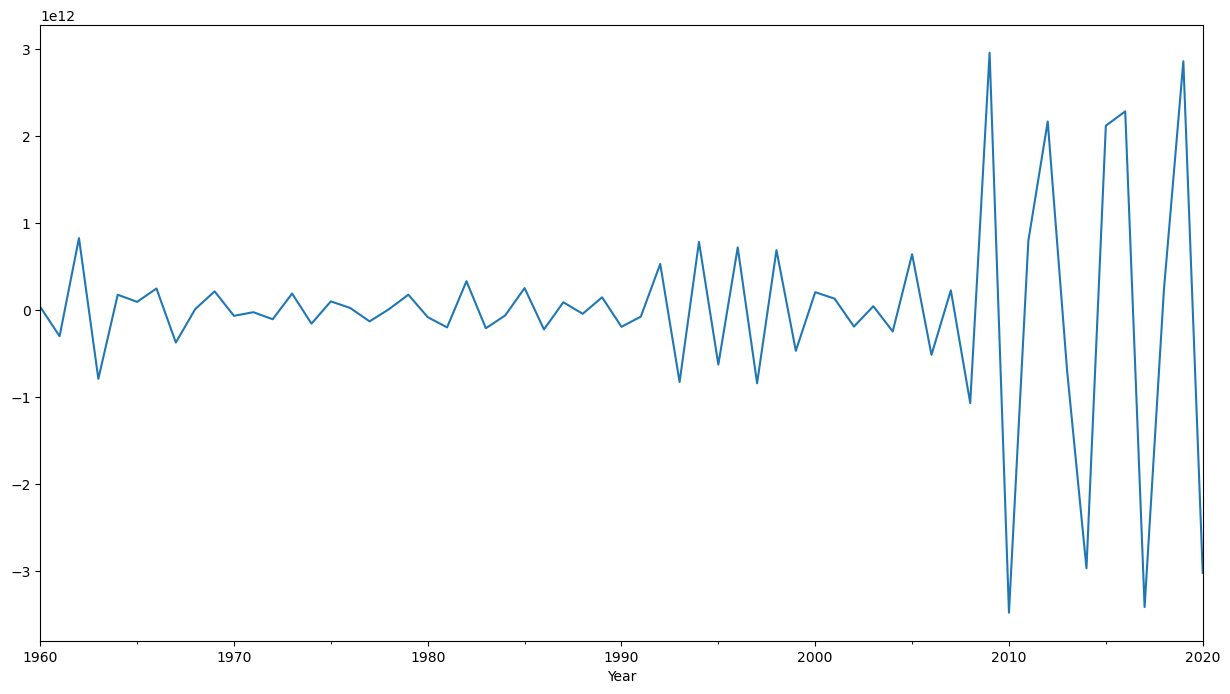

In [208]:
residuals.plot()

In [209]:
residuals.describe()

count    6.100000e+01
mean    -1.761993e+10
std      1.170672e+12
min     -3.477187e+12
25%     -2.222712e+11
50%      1.076720e+10
75%      2.403354e+11
max      2.956242e+12
dtype: float64

In [210]:
output = model_fit.forecast()

In [211]:
output

2021-12-31    1.216373e+12
Freq: A-DEC, dtype: float64

In [212]:
 model_fit.forecast(10)

2021-12-31    1.216373e+12
2022-12-31   -5.555802e+12
2023-12-31   -2.880390e+13
2024-12-31   -9.178372e+13
2025-12-31   -2.395397e+14
2026-12-31   -5.505246e+14
2027-12-31   -1.153498e+15
2028-12-31   -2.250068e+15
2029-12-31   -4.142796e+15
2030-12-31   -7.272482e+15
Freq: A-DEC, Name: predicted_mean, dtype: float64

<Axes: >

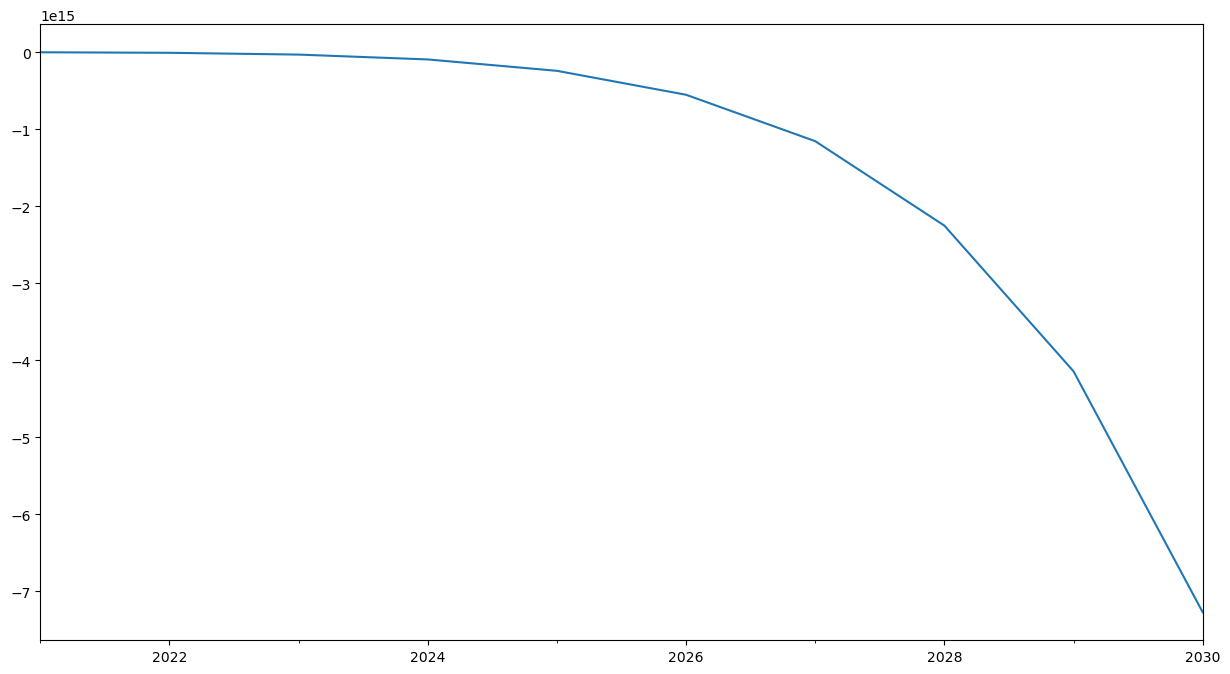

In [213]:
model_fit.forecast(10).plot()

In [214]:
df.head()

,GDP (current US$),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
Year,,,,,,,,
1960-12-31,3.702988e+10,6.83,4.46,674536630.9,1.78,445954579,2.31,41.13
1961-12-31,3.923244e+10,5.96,4.30,666357094.9,1.70,456351876,2.33,41.74
1962-12-31,4.216148e+10,6.03,4.17,512791844.0,3.63,467024193,2.34,42.34
1963-12-31,4.842192e+10,5.91,4.28,607862500.4,2.95,477933619,2.34,42.94
1964-12-31,5.648029e+10,5.69,3.73,499145125.8,13.36,489059309,2.33,43.57


In [215]:
train_size = int(df.shape[0]*0.7)

In [216]:
train, test = df['GDP (current US$) '] [0:train_size], df['GDP (current US$) '][train_size:]

In [217]:
train.shape

(42,)

In [218]:
test.shape

(19,)

In [219]:
data=train
predict=[]
for t in test:
  model=ARIMA(data, order=(2,10,2))
  model_fit=model.fit()
  y=model_fit.forecast()
  print(y.values)
  predict.append(y.values)
  data = np.append(data,t)
  data=pd.Series(data) 

[4.44763168e+11]
[9.08045266e+11]
[6.74242035e+11]
[3.80924151e+11]
[1.23291983e+12]
[1.25405276e+12]
[2.04261659e+12]
[-1.24049827e+12]
[3.54747526e+12]
[0.]
[-2.68775978e+12]
[2.10921236e+12]
[6.02409873e+12]
[-1.59146661e+11]
[2.33974622e+11]
[5.95025828e+12]
[2.52208501e+12]
[-3.41685742e+11]
[6.25066197e+12]


In [220]:
predict

[array([4.44763168e+11]),
 array([9.08045266e+11]),
 array([6.74242035e+11]),
 array([3.80924151e+11]),
 array([1.23291983e+12]),
 array([1.25405276e+12]),
 array([2.04261659e+12]),
 array([-1.24049827e+12]),
 array([3.54747526e+12]),
 array([0.]),
 array([-2.68775978e+12]),
 array([2.10921236e+12]),
 array([6.02409873e+12]),
 array([-1.59146661e+11]),
 array([2.33974622e+11]),
 array([5.95025828e+12]),
 array([2.52208501e+12]),
 array([-3.41685742e+11]),
 array([6.25066197e+12])]

In [221]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test.values, predict)

In [222]:
mse

4.948691137381219e+24

In [223]:
mae=mean_absolute_error(test.values, predict)

In [224]:
mae

1662023290160.1382

Higher MSE & MAE score: Model is not Performs better than AR model

# SARIMA Model

In [225]:
import pandas as pd

In [226]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [227]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [228]:
result_a = seasonal_decompose(df['GDP (current US$) '], model='additive', period=12)


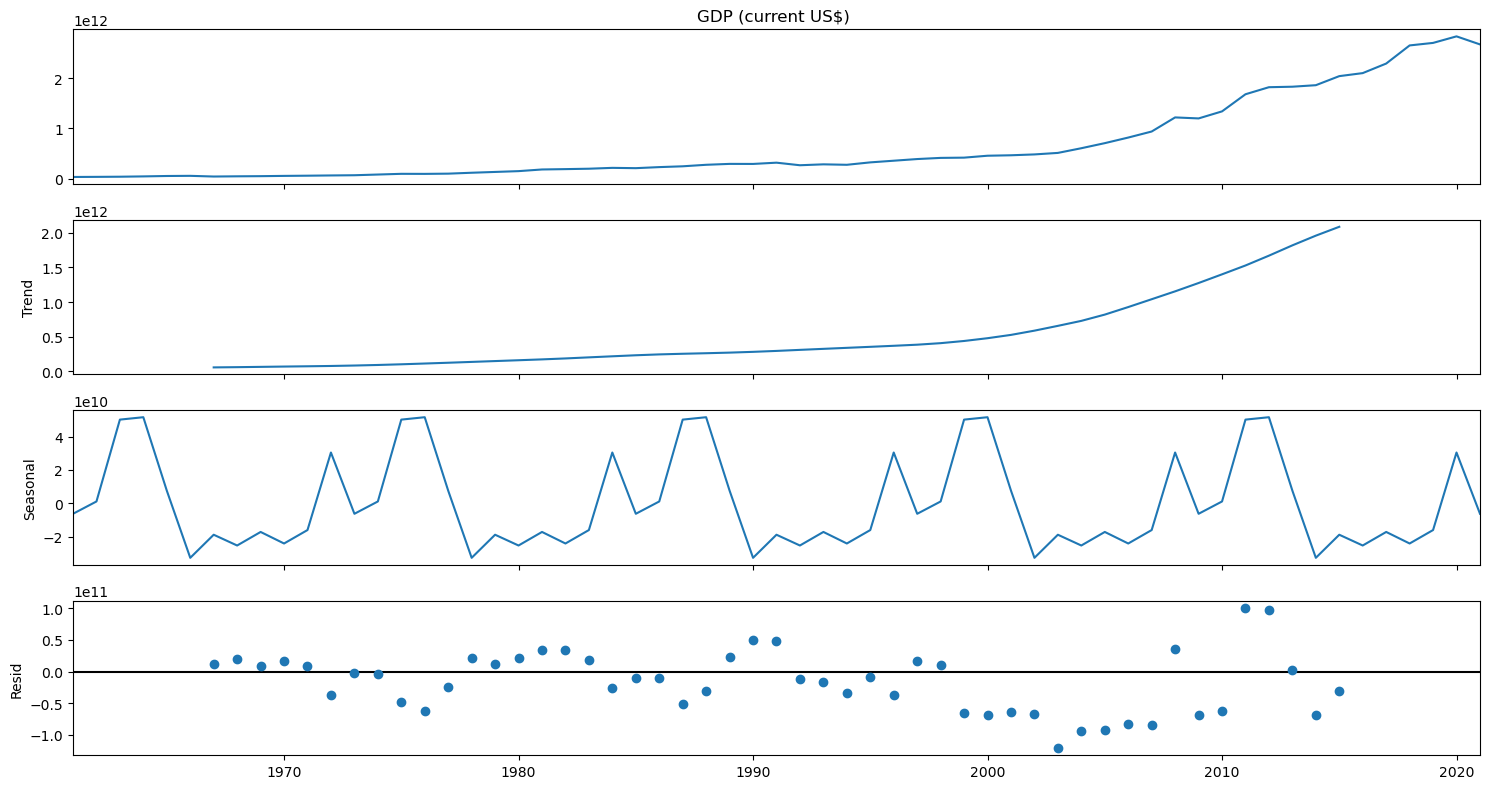

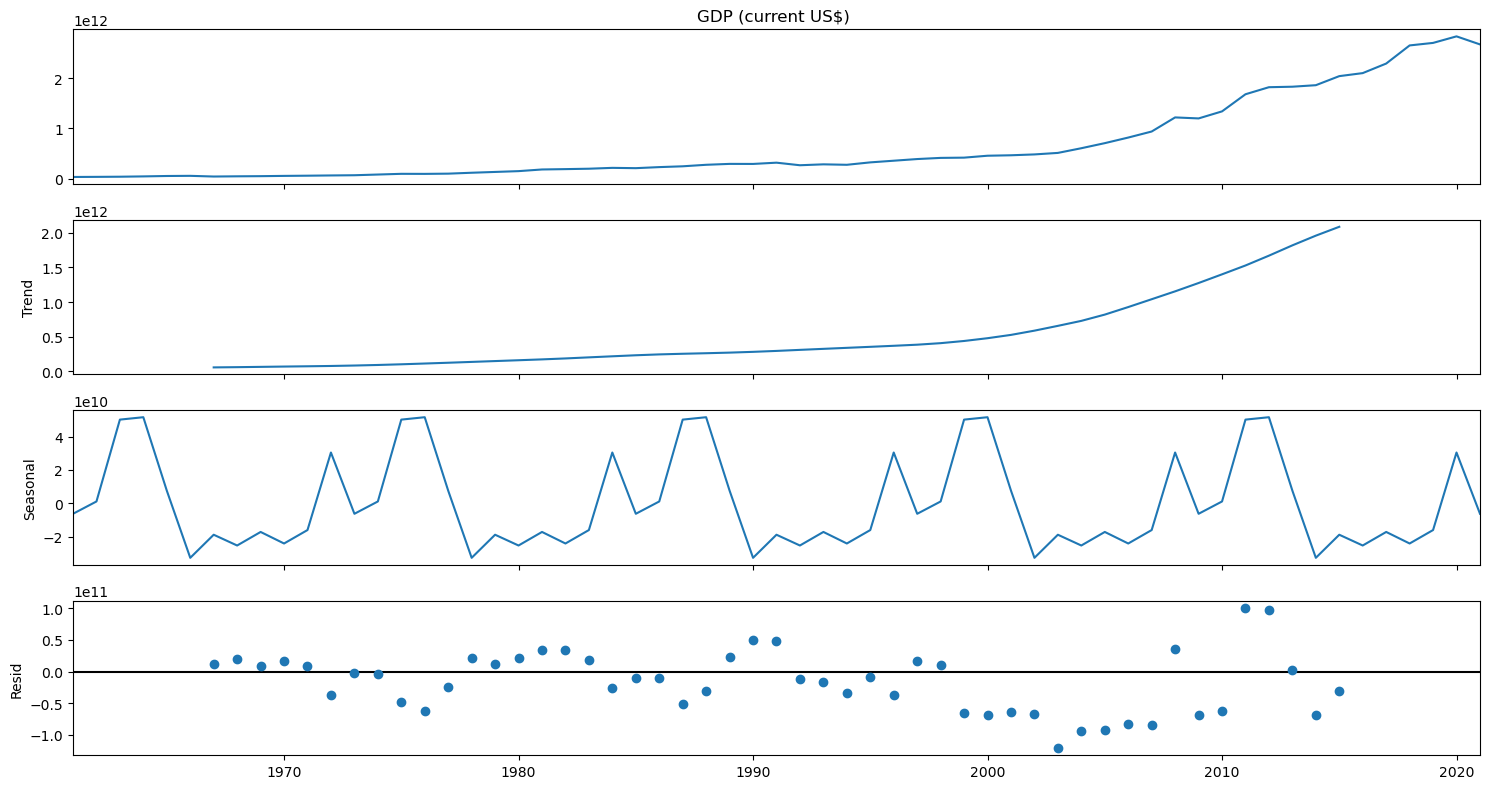

In [229]:
result_a.plot()

In [230]:
model = SARIMAX(df['GDP (current US$) '], order=(2,10,2), seasonal_order=(2,10,2,12))

In [231]:
model_fit = model.fit()

In [232]:
residuals = model_fit.resid

<Axes: xlabel='Year'>

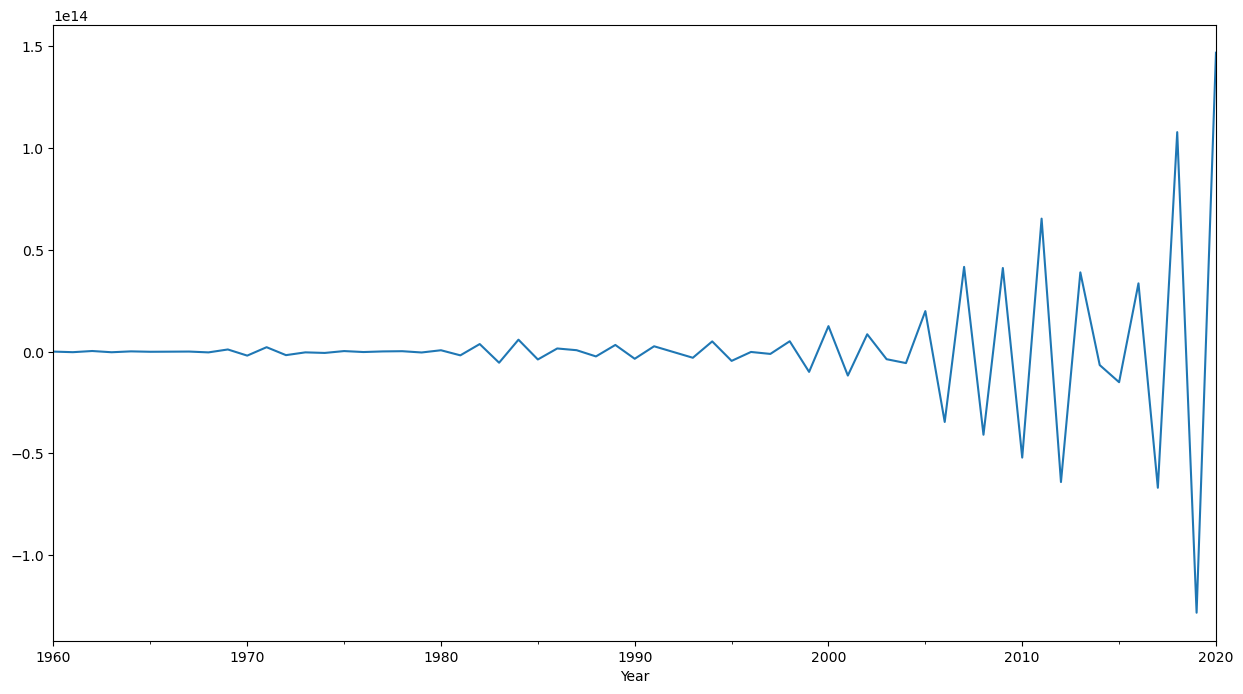

In [233]:
residuals.plot()

In [234]:
output = model_fit.forecast()

In [235]:
output

2021-12-31    1.340563e+14
Freq: A-DEC, dtype: float64

In [237]:
model_fit.forecast(10)

2021-12-31    1.340563e+14
2022-12-31    1.155233e+15
2023-12-31    5.824555e+15
2024-12-31    2.191867e+16
2025-12-31    6.799420e+16
2026-12-31    1.834259e+17
2027-12-31    4.446972e+17
2028-12-31    9.904921e+17
2029-12-31    2.058661e+18
2030-12-31    4.038877e+18
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [238]:
yhat = model_fit.predict()

In [239]:
yhat.head()

1960-12-31    0.000000e+00
1961-12-31    2.869816e+11
1962-12-31   -2.846179e+11
1963-12-31    3.281197e+11
1964-12-31   -9.289719e+10
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [240]:
import matplotlib.pyplot as pyplot

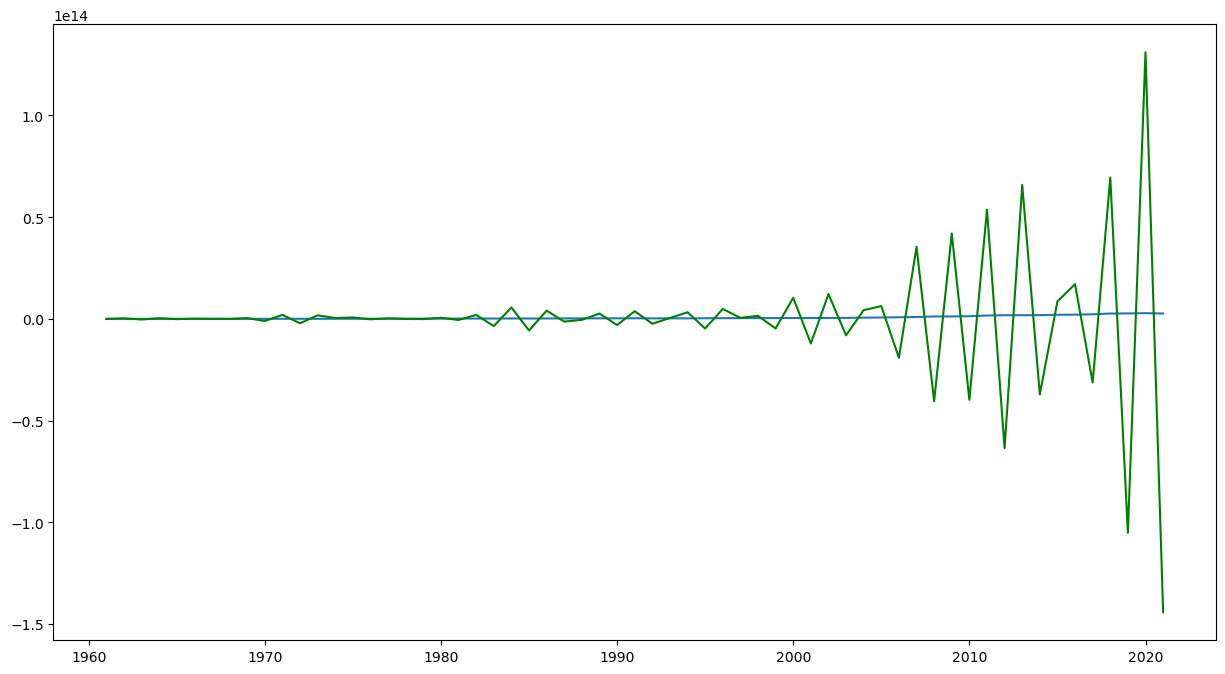

In [241]:
pyplot.plot(df['GDP (current US$) '])
pyplot.plot(yhat, color='green')

In [242]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)

# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [243]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_diff,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [244]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC),
    SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is -77.18324875536291 for model SARIMAX(1, 0, 0)x(1, 0, 1, 12)


In [245]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(data_diff,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8245      0.093      8.882      0.000       0.643       1.006
ar.S.L12      -0.3742      0.179     -2.093      0.036      -0.725      -0.024
ma.S.L12      -1.0013    204.079     -0.005      0.996    -400.989     398.986
sigma2         0.0035      0.706      0.005      0.996      -1.380       1.386


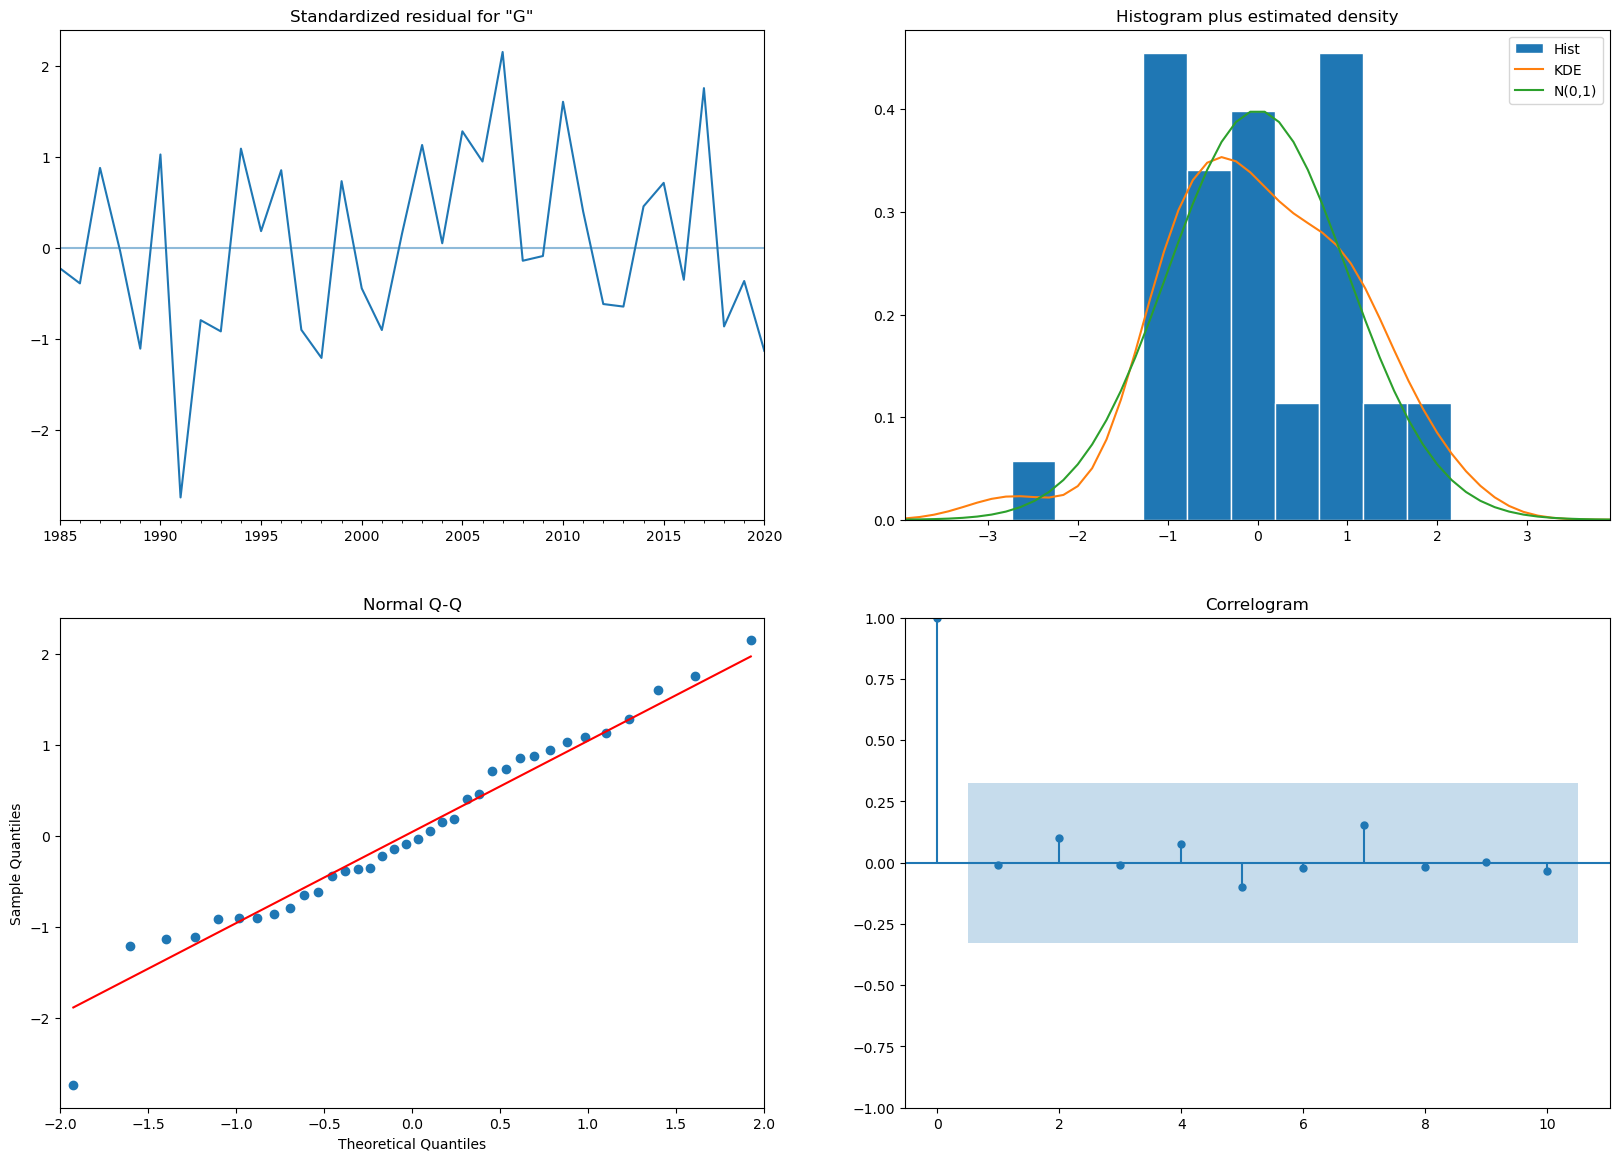

In [246]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [253]:
from datetime import datetime  # Import the datetime module

# Create a date object
start_index = datetime(2017, 12, 31)
end_index = datetime(2030, 12, 31)


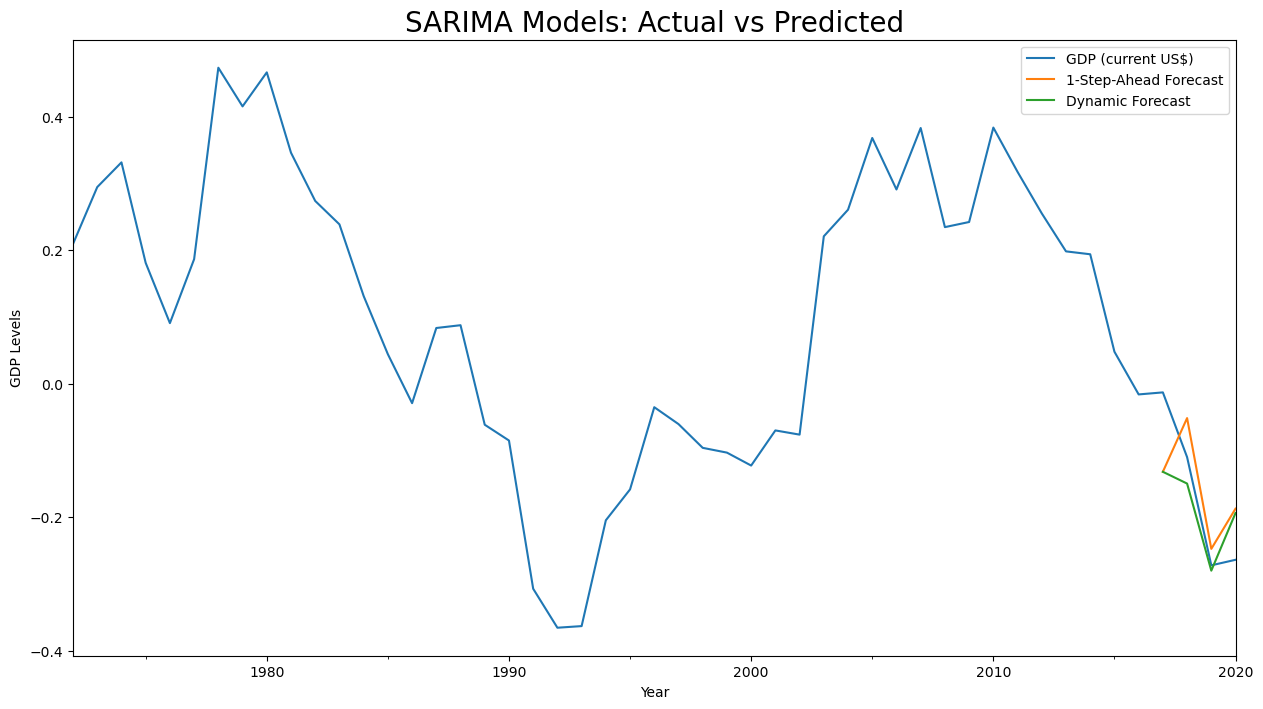

In [255]:
# One-step Ahead Forecasting
pred = results.get_prediction(start=start_index, dynamic=False)
pred_conf = pred.conf_int()

# Dynamic Forecasting
pred_dynamic = results.get_prediction(start=start_index, dynamic=True)
pred_dynamic_conf = pred_dynamic.conf_int()

# ploting the above
ax = data_diff.plot(figsize=(15, 8))
pred.predicted_mean.plot(ax=ax, label='1-Step-Ahead Forecast')
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast')
plt.ylabel('GDP Levels')
plt.xlabel('Year')
plt.title("SARIMA Models: Actual vs Predicted",fontsize=20)
plt.legend()
plt.show()





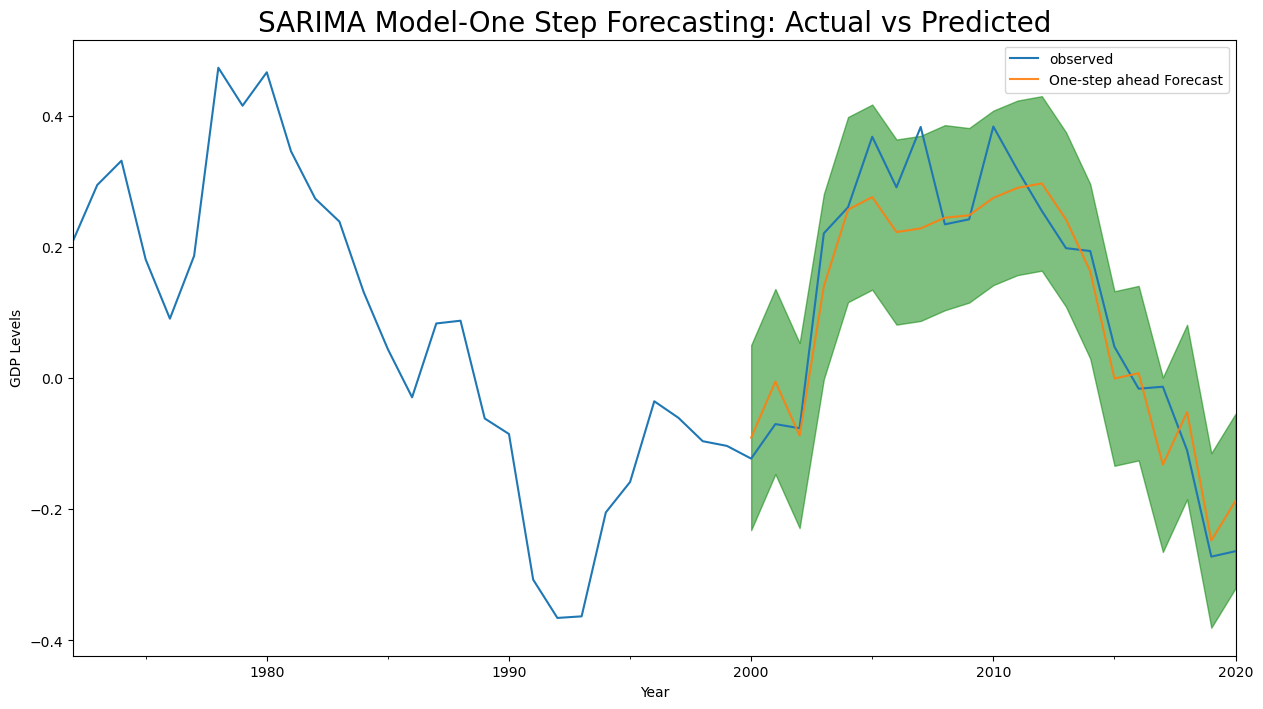

In [256]:
start_index = datetime(2000, 12, 31)
# One-step Ahead Forecasting
pred = results.get_prediction(start=start_index, dynamic=False)
pred_conf = pred.conf_int()

# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 8

# Plot observed values
ax = data_diff.plot(label='observed')
# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)
# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)
# Set axes labels
ax.set_xlabel('Year')
ax.set_title("SARIMA Model-One Step Forecasting: Actual vs Predicted",fontsize=20)
ax.set_ylabel('GDP Levels')
plt.legend()
plt.show()


In [258]:
# Extract the predicted and true values of our time series
GDP_forecasted = pred_dynamic.predicted_mean
GDP_truth = data_diff['1990-01-01':]

# Compute the mean square error
mse = ((GDP_forecasted - GDP_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))

The Mean Squared Error of our forecasts is 0.00518


In [259]:
# Get forecast 10 steps ahead in future
prediction = results.get_forecast(steps=10)
# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

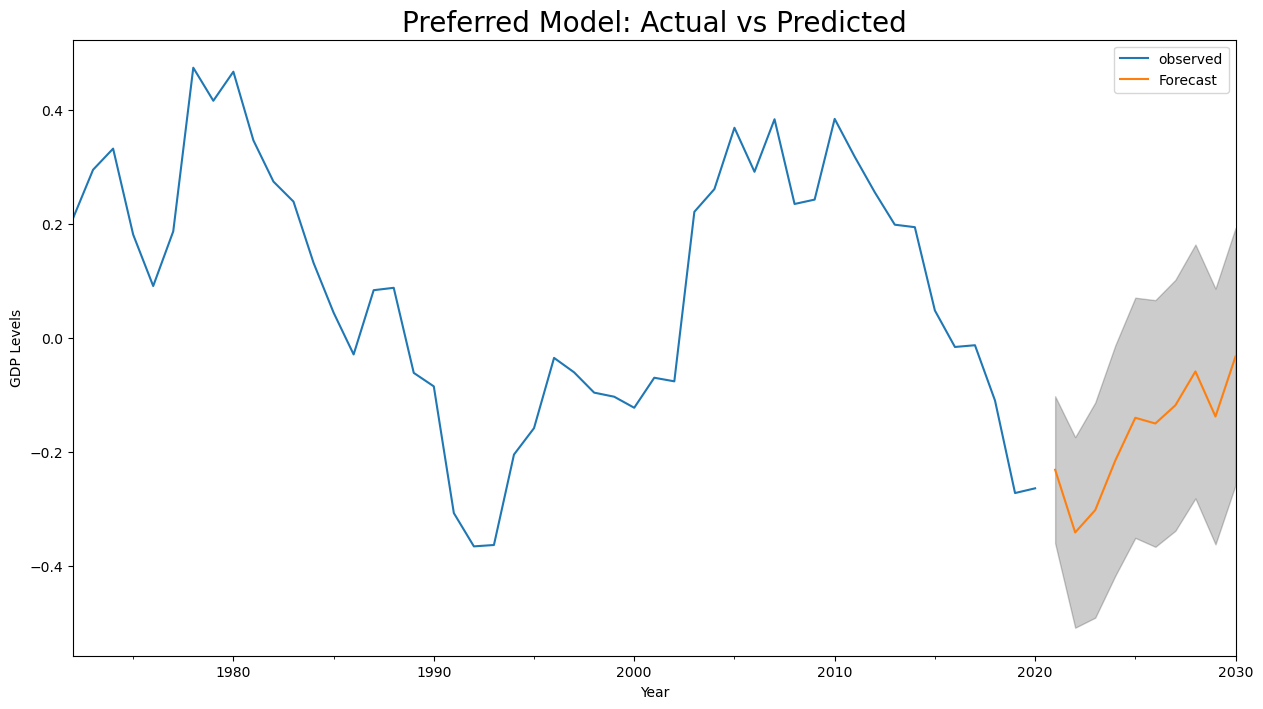

In [260]:
# Plot future predictions with confidence intervals
ax = data_diff.plot(label='observed', figsize=(15, 8))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Year')
ax.set_ylabel('GDP Levels')
ax.set_title("Preferred Model: Actual vs Predicted",fontsize=20)

plt.legend()
plt.show()

# Multiple Linear Regression

In [1]:
import pandas as pd

In [22]:
sn.add_constant

<function statsmodels.tools.tools.add_constant(data, prepend=True, has_constant='skip')>

In [23]:
X_multi = df.drop("GDP (current US$) ",axis=1)

In [24]:
X_multi.head()

,Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
Year,,,,,,,
1960-12-31,6.83,4.46,674536630.9,1.78,445954579,2.31,41.13
1961-12-31,5.96,4.30,666357094.9,1.70,456351876,2.33,41.74
1962-12-31,6.03,4.17,512791844.0,3.63,467024193,2.34,42.34
1963-12-31,5.91,4.28,607862500.4,2.95,477933619,2.34,42.94
1964-12-31,5.69,3.73,499145125.8,13.36,489059309,2.33,43.57


In [25]:
y_multi = df['GDP (current US$) ']

In [26]:
y_multi.head()

Year
1960-12-31    3.702988e+10
1961-12-31    3.923244e+10
1962-12-31    4.216148e+10
1963-12-31    4.842192e+10
1964-12-31    5.648029e+10
Name: GDP (current US$) , dtype: float64

In [27]:
import statsmodels.api as sn

In [28]:
X_multi_cons = sn.add_constant(X_multi)

In [29]:
X_multi_cons.head()

,const,Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
Year,,,,,,,,
1960-12-31,1.0,6.83,4.46,674536630.9,1.78,445954579,2.31,41.13
1961-12-31,1.0,5.96,4.30,666357094.9,1.70,456351876,2.33,41.74
1962-12-31,1.0,6.03,4.17,512791844.0,3.63,467024193,2.34,42.34
1963-12-31,1.0,5.91,4.28,607862500.4,2.95,477933619,2.34,42.94
1964-12-31,1.0,5.69,3.73,499145125.8,13.36,489059309,2.33,43.57


In [34]:

# fit the model
lm_multi = sn.OLS(y_multi, X_multi).fit()


In [35]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     GDP (current US$)    R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              475.0
Date:                Sat, 17 Feb 2024   Prob (F-statistic):                    4.04e-46
Time:                        12:58:45   Log-Likelihood:                         -1648.3
No. Observations:                  61   AIC:                                      3311.
Df Residuals:                      54   BIC:                                      3325.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Imports of goods and services (% of GDP)       3.889e+10   1.89e+10      2.060      0.044    1.05e+09    7.67e+10
Exports of goods and services (% of GDP)      -7.185e+10   2.63e+10     -2.737      0.008   -1.24e+11   -1.92e+10
 Total reserves (includes gold, current US$)      4.4722      0.339     13.204      0.000       3.793       5.151
Inflation, consumer prices (annual %)         -3.372e+09   3.96e+09     -0.852      0.398   -1.13e+10    4.56e+09
Population, total                               400.3011    924.479      0.433      0.667   -1453.167    2253.769
Population growth (annual %)                  -2.774e+11   2.69e+11     -1.032      0.307   -8.17e+11    2.62e+11
Life expectancy at birth, total (years)         1.24e+10   2.37e+10      0.524      0.602   -3.51e+10    5.99e+10
==============================================================================
Omnibus:                       20.419   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.395
Skew:                          -0.952   Prob(JB):                     5.11e-11
Kurtosis:                       6.876   Cond. No.                     2.68e+12
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.68e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
from sklearn.linear_model import LinearRegression


In [38]:
lm3 = LinearRegression()

In [39]:
lm3.fit(X_multi, y_multi)

LinearRegression()

In [40]:
print(lm3.intercept_, lm3.coef_)

1049746471215.1271 [ 4.31185994e+10 -8.24426839e+10  3.89910889e+00 -2.56430441e+09
  4.10743599e+02 -6.41190223e+11  8.10544184e+09]


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X_multi, y_multi,test_size=0.2,random_state=0)

In [43]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(48, 7) (13, 7) (48,) (13,)


In [44]:
lm_a=LinearRegression()

In [45]:
lm_a.fit(X_train,y_train)

LinearRegression()

In [46]:
y_test_a=lm_a.predict(X_test)

In [47]:
y_train_a=lm_a.predict(X_train)

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test,y_test_a)

0.8976472060077194

In [51]:
r2_score(y_train,y_train_a)

0.9811678502284465

# Interface

In [1]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/c5/ea/b50f166fb6e5c244568f798ade98fa261b82588ab9ad83230b327a82b42f/streamlit-1.31.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/c5/e4/7fcceef127badbb0d644d730d992410e4f3799b295c9964a172f92a469c7/altair-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich<14,>=10.14.0 from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for tzlocal<6,>=1.1 from https://files.pythonhosted.org/packages/97/3f/c4c51c55ff8487f2e6d0e618dba917e3c3ee2caae6cf0fbb59c9b1876f2e/tzlo

In [7]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
def load_arima_model():
    try:
        # Load the ARIMA model from file
        model = sm.load('arima_model.pkl')
        return model
    except FileNotFoundError:
        st.error("ARIMA model not found. Please make sure you have saved the model.")
        return None
# Function to load the ARIMA model
def load_arima_model():
    try:
        # Load the ARIMA model from file
        model = sm.load('arima_model.pkl')
        return model
    except FileNotFoundError:
        st.error("ARIMA model not found. Please make sure you have saved the model.")
        return None

# Function to load data_diff from CSV
def load_data_diff():
    try:
        data_diff = pd.read_csv('data_diff.csv')
        return data_diff
    except FileNotFoundError:
        st.error("data_diff.csv not found. Please make sure you have saved the file.")
        return None

# Function to make forecasts using the ARIMA model
def make_arima_forecasts(model, horizon):
    try:
        # Perform forecasts using the ARIMA model
        forecasts = model.forecast(steps=horizon)
        return forecasts
    except Exception as e:
        st.error(f"An error occurred while making forecasts: {str(e)}")
        return None
    def main():
    st.title('ARIMA Time Series Forecasting')

    # Load the ARIMA model
    arima_model = load_arima_model()
    if arima_model is None:
        st.stop()

    # Load the data_diff
    data_diff = load_data_diff()
    if data_diff is None:
        st.stop()

    # Display the current data_diff
    st.subheader('Differenced Time Series Data')
    st.write(data_diff)  # Display the differenced time series data

    # Get user input for the forecasting horizon
    max_horizon = len(data_diff)  # Maximum allowed horizon is the length of the available data
    horizon = st.number_input('Enter the forecasting horizon:', value=10, min_value=1, max_value=max_horizon, step=1)

    # Make forecasts using the ARIMA model
    forecasts = make_arima_forecasts(arima_model, horizon)
    if forecasts is None:
        st.stop()

    # Create a DataFrame to display the forecasts
    last_date = data_diff.index[-1]
    forecast_dates = pd.date_range(start=last_date, periods=horizon + 1, closed='right')
    forecast_values = np.concatenate(([data_diff.iloc[-1]], forecasts))
    forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=forecast_dates)

    # Display the forecasts as a graph
    st.subheader('ARIMA Forecasts')
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(data_diff.index, data_diff['Original'], label='Original Data')
    ax.plot(forecast_dates, forecast_values, label='Forecasts', linestyle='--', color='orange')
    ax.set_xlabel('Date')
    ax.set_ylabel('Differenced Value')
    ax.legend()
    st.pyplot(fig)

if __name__ == '__main__':
    main()

Overwriting app.py


In [9]:
# Running the application
!streamlit run app.py

^C
